In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
import os

In [2]:
exps_dir = "../../exps"
if os.path.exists(exps_dir) == False: # tạo thư mục (nếu chưa có)
  os.makedirs(exps_dir, exist_ok=True)

save_dir = f"{exps_dir}"
os.makedirs(save_dir, exist_ok=True)
test_size=0.33
seed=42

In [3]:
data= pd.read_excel('../../data/May 13.xls')
data

id          Company  Index  Year  CashRatio          EBIT  \
0      A32       Công ty 32  UPCoM  2006        NaN           NaN   
1      A32       Công ty 32  UPCoM  2007        NaN           NaN   
2      A32       Công ty 32  UPCoM  2008        NaN           NaN   
3      A32       Công ty 32  UPCoM  2009        NaN           NaN   
4      A32       Công ty 32  UPCoM  2010        NaN           NaN   
...    ...              ...    ...   ...        ...           ...   
26624  YTC  XNK Y tế TP.HCM  UPCoM  2018       0.08  3.617160e+10   
26625  YTC  XNK Y tế TP.HCM  UPCoM  2019       0.21  3.319102e+10   
26626  YTC  XNK Y tế TP.HCM  UPCoM  2020       0.03 -1.965803e+10   
26627  YTC  XNK Y tế TP.HCM  UPCoM  2021       0.02  9.693024e+08   
26628  YTC  XNK Y tế TP.HCM  UPCoM  2022       0.03  4.674561e+09   

             EBITDA  GrossProfitMargin  EBITDARatio  EBITRatio  ...  \
0               NaN                NaN          NaN        NaN  ...   
1               NaN                NaN          NaN        NaN  ...   
2               NaN                NaN          NaN        NaN  ...   
3               NaN                NaN          NaN        NaN  ...   
4               NaN                NaN          NaN        NaN  ...   
...             ...                ...          ...        ...  ...   
26624  4.021374e+10             0.1744       0.0760     0.0683  ...   
26625  3.700330e+10             0.1836       0.0726     0.0651  ...   
26626 -1.455882e+10             0.0861      -0.0257    -0.0347  ...   
26627  5.319168e+09             0.0868       0.0088     0.0016  ...   
26628  9.015421e+09             0.0907       0.0133     0.0069  ...   

       FixedAssets_w  cashholding  cashholding_w  Tangibility  Tangibility_w  \
0                NaN          NaN            NaN          NaN            NaN   
1                NaN          NaN            NaN          NaN            NaN   
2                NaN          NaN            NaN          NaN            NaN   
3                NaN          NaN            NaN          NaN            NaN   
4                NaN          NaN            NaN          NaN            NaN   
...              ...          ...            ...          ...            ...   
26624   4.814777e+10     0.050601       0.050601     0.062617       0.062617   
26625   5.160008e+10     0.065683       0.065683     0.068599       0.068599   
26626   5.516760e+10     0.012319       0.012319     0.055415       0.055415   
26627   5.406539e+10     0.017190       0.017190     0.069243       0.069243   
26628   5.176421e+10     0.027087       0.027087     0.056045       0.056045   

            ROA       ROE     ROA_w     ROE_w       _merge  
0           NaN       NaN       NaN       NaN  Matched (3)  
1           NaN       NaN       NaN       NaN  Matched (3)  
2           NaN       NaN       NaN       NaN  Matched (3)  
3           NaN       NaN       NaN       NaN  Matched (3)  
4           NaN       NaN       NaN       NaN  Matched (3)  
...         ...       ...       ...       ...          ...  
26624  0.047042  0.640009  0.047042  0.640009  Matched (3)  
26625  0.044125  0.554094  0.044125  0.554094  Matched (3)  
26626 -0.019746 -1.460577 -0.019746 -0.618672  Matched (3)  
26627  0.001241  0.044573  0.001241  0.044573  Matched (3)  
26628  0.005061  0.144263  0.005061  0.144263  Matched (3)  

[26629 rows x 218 columns]

In [4]:
data.columns

Index(['id', 'Company', 'Index', 'Year', 'CashRatio', 'EBIT', 'EBITDA',
       'GrossProfitMargin', 'EBITDARatio', 'EBITRatio',
       ...
       'FixedAssets_w', 'cashholding', 'cashholding_w', 'Tangibility',
       'Tangibility_w', 'ROA', 'ROE', 'ROA_w', 'ROE_w', '_merge'],
      dtype='object', length=218)

In [5]:
for i in data.columns:
    print(i)

id
Company
Index
Year
CashRatio
EBIT
EBITDA
GrossProfitMargin
EBITDARatio
EBITRatio
QuickRatio
CurrentRatio
LongDetboverOE
LongDebtoverTA
TotalDebtoverOE
TotalDebtoverTA
ShortDebtoverOE
ShortDebtoverTA
IAoverTA
TAoverOE
EBITDAoverShortDebtandExpenses
EBTMargin
NetProfitMarginRatio
TotalAssetTurnover
TotalEquityRatio
Tỷsuấtlợinhuậntừkinhdoanh
LNSTCFODoanhthu
Giátrịcổphiếu
TotalRevenue
SalesDeductions
NetRevenue
COGS
GrossProfit
RevenueFinancialActivities
FinancialExpenses
InterestExpenses
Lãilỗtừcôngtyliêndoanh
SellingExpenses
AdminExpensesCons
OperatingIncomeCons
OtherRevenue
OtherExpenses
OtherIncome
AccountingIncomePreTax
CorpTaxExpenses
CurrentCorpTax
DeferredIncomeTax
IncomeAfterDefTax
MinorityInterest
Cổđôngcủacôngtymẹ
EarningPerShare
DilutedEarningsPerShare
CURRENTASSETS
Cash
CashEquivalents
ShortTermInvestments
TradingSecurities
AllowanceDeclineInSec
HTMInvestments
CurrentReceivables
CurTradeReceivables
CurAdvancestoSuppliers
RelatedPartiesReceivables
ConstructionReceivables
Sho

In [6]:
# data['ResearchDevFund_ratio']=data.ResearchDevFund/data.TotalRevenue
# data['SciTechFund_ratio']=data.SciTechFund/data.TotalRevenue
# # Tính ROA
# data['ROA'] = data['IncomeAfterDefTax'] / data['TOTALASSETS']

# # Tính ROE
# data['ROE'] = data['IncomeAfterDefTax'] / data['OWNERSEQUITY']
# # data['Intangible Assets']=data['CostIntanFA']/data['TOTALASSETS']
# # data['Intangible Assets1']=data['AccDepIntanFA']/data['TOTALASSETS']
# # data['IAoverTA']
# # data['Firmsize_w']=np.log(data['TOTALASSETS'])
# data['T.Debt']=data['TotalDebtoverOE']/data['TOTALASSETS']
# data['T_Debt1']=data['TotalDebtoverTA']/data['TOTALASSETS']
# data

In [7]:
w_cols=['id', 'Company', 'Index', 'Year','SciTechRatio_w','RandDRatio_w','TotalDebtoverTotalAssets_w','IAoverTA_w','TotalDebtoverTA_w','CashRatio_w','Firmsize_w','SciTechFund_w','ResearchDevFund_w','FixedAssets_w','cashholding','cashholding_w','Tangibility_w','ROA_w','ROE_w',]

In [8]:
df = data[w_cols]
df

id          Company  Index  Year  SciTechRatio_w  RandDRatio_w  \
0      A32       Công ty 32  UPCoM  2006             NaN           NaN   
1      A32       Công ty 32  UPCoM  2007             NaN           NaN   
2      A32       Công ty 32  UPCoM  2008             NaN           NaN   
3      A32       Công ty 32  UPCoM  2009             NaN           NaN   
4      A32       Công ty 32  UPCoM  2010             NaN           NaN   
...    ...              ...    ...   ...             ...           ...   
26624  YTC  XNK Y tế TP.HCM  UPCoM  2018             0.0      0.026655   
26625  YTC  XNK Y tế TP.HCM  UPCoM  2019             0.0      0.030263   
26626  YTC  XNK Y tế TP.HCM  UPCoM  2020             0.0      0.022866   
26627  YTC  XNK Y tế TP.HCM  UPCoM  2021             0.0      0.000000   
26628  YTC  XNK Y tế TP.HCM  UPCoM  2022             0.0      0.000000   

       TotalDebtoverTotalAssets_w  IAoverTA_w  TotalDebtoverTA_w  CashRatio_w  \
0                             NaN         NaN                NaN          NaN   
1                             NaN         NaN                NaN          NaN   
2                             NaN         NaN                NaN          NaN   
3                             NaN         NaN                NaN          NaN   
4                             NaN         NaN                NaN          NaN   
...                           ...         ...                ...          ...   
26624                        0.45        0.00               0.45         0.08   
26625                        0.37        0.00               0.37         0.21   
26626                        0.23        0.00               0.23         0.03   
26627                        0.28        0.01               0.28         0.02   
26628                        0.21        0.01               0.21         0.03   

       Firmsize_w  SciTechFund_w  ResearchDevFund_w  FixedAssets_w  \
0             NaN            NaN                NaN            NaN   
1             NaN            NaN                NaN            NaN   
2             NaN            NaN                NaN            NaN   
3             NaN            NaN                NaN            NaN   
4             NaN            NaN                NaN            NaN   
...           ...            ...                ...            ...   
26624   27.368263            0.0       2.049601e+10   4.814777e+10   
26625   27.346266            0.0       2.276410e+10   5.160008e+10   
26626   27.626545            0.0       2.276410e+10   5.516760e+10   
26627   27.383589            0.0       0.000000e+00   5.406539e+10   
26628   27.551567            0.0       0.000000e+00   5.176421e+10   

       cashholding  cashholding_w  Tangibility_w     ROA_w     ROE_w  
0              NaN            NaN            NaN       NaN       NaN  
1              NaN            NaN            NaN       NaN       NaN  
2              NaN            NaN            NaN       NaN       NaN  
3              NaN            NaN            NaN       NaN       NaN  
4              NaN            NaN            NaN       NaN       NaN  
...            ...            ...            ...       ...       ...  
26624     0.050601       0.050601       0.062617  0.047042  0.640009  
26625     0.065683       0.065683       0.068599  0.044125  0.554094  
26626     0.012319       0.012319       0.055415 -0.019746 -0.618672  
26627     0.017190       0.017190       0.069243  0.001241  0.044573  
26628     0.027087       0.027087       0.056045  0.005061  0.144263  

[26629 rows x 19 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26629 entries, 0 to 26628
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          26629 non-null  object 
 1   Company                     26629 non-null  object 
 2   Index                       26629 non-null  object 
 3   Year                        26629 non-null  int64  
 4   SciTechRatio_w              19955 non-null  float64
 5   RandDRatio_w                19944 non-null  float64
 6   TotalDebtoverTotalAssets_w  20741 non-null  float64
 7   IAoverTA_w                  20849 non-null  float64
 8   TotalDebtoverTA_w           20741 non-null  float64
 9   CashRatio_w                 20727 non-null  float64
 10  Firmsize_w                  19976 non-null  float64
 11  SciTechFund_w               19959 non-null  float64
 12  ResearchDevFund_w           19948 non-null  float64
 13  FixedAssets_w               199

In [10]:
df.describe()

Year  SciTechRatio_w  RandDRatio_w  TotalDebtoverTotalAssets_w  \
count  26629.000000    19955.000000  19944.000000                20741.000000   
mean    2014.001502        0.000204      0.044979                    0.218529   
std        4.899324        0.001216      0.067836                    0.211974   
min     2006.000000        0.000000      0.000000                    0.000000   
25%     2010.000000        0.000000      0.002381                    0.010000   
50%     2014.000000        0.000000      0.017476                    0.170000   
75%     2018.000000        0.000000      0.056805                    0.360000   
max     2022.000000        0.009801      0.355467                    0.860000   

         IAoverTA_w  TotalDebtoverTA_w   CashRatio_w    Firmsize_w  \
count  20849.000000       20741.000000  20727.000000  19976.000000   
mean       0.002037           0.218529      0.577180     26.823897   
std        0.009674           0.211974      1.499752      1.541666   
min        0.000000           0.000000      0.000000     23.668734   
25%        0.000000           0.010000      0.050000     25.766240   
50%        0.000000           0.170000      0.160000     26.688649   
75%        0.000000           0.360000      0.490000     27.733355   
max        0.070000           0.860000     14.190000     32.382339   

       SciTechFund_w  ResearchDevFund_w  FixedAssets_w   cashholding  \
count   1.995900e+04       1.994800e+04   1.997900e+04  19975.000000   
mean    2.775332e+08       4.328418e+10   4.608941e+11      0.051123   
std     1.791388e+09       1.285507e+11   1.440077e+12      0.067176   
min     0.000000e+00       0.000000e+00   6.097837e+06      0.000000   
25%     0.000000e+00       8.032081e+08   2.008549e+10      0.012204   
50%     0.000000e+00       6.512920e+09   6.552022e+10      0.030172   
75%     0.000000e+00       2.461194e+10   2.415835e+11      0.063946   
max     1.536171e+10       9.418472e+11   1.081110e+13      0.999930   

       cashholding_w  Tangibility_w         ROA_w         ROE_w  
count   19975.000000   19975.000000  19835.000000  19826.000000  
mean        0.050167       0.271057      0.062018      0.154002  
std         0.060232       0.234986      0.081134      0.201798  
min         0.000375       0.000032     -0.212303     -0.618672  
25%         0.012204       0.081791      0.016736      0.040284  
50%         0.030172       0.205296      0.052580      0.133886  
75%         0.063946       0.403818      0.099919      0.247876  
max         0.365875       0.906662      0.332130      0.875624

In [11]:
df.drop_duplicates(inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_21248\3006716147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [12]:
len(df)

26622

In [13]:
# Thay thế giá trị inf bằng NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Loại bỏ các dòng chứa NaN
# data.dropna(axis=0, how='any', inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_21248\3341857814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace([np.inf, -np.inf], np.nan, inplace=True)


In [14]:
len(data)

26629

In [15]:
change_category = list((df.select_dtypes('object')).columns)
change_category

['id', 'Company', 'Index']

In [16]:
df[change_category]=df[change_category].astype('category')
df.dtypes

C:\Users\PC\AppData\Local\Temp\ipykernel_21248\2069209629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[change_category]=df[change_category].astype('category')


id                            category
Company                       category
Index                         category
Year                             int64
SciTechRatio_w                 float64
RandDRatio_w                   float64
TotalDebtoverTotalAssets_w     float64
IAoverTA_w                     float64
TotalDebtoverTA_w              float64
CashRatio_w                    float64
Firmsize_w                     float64
SciTechFund_w                  float64
ResearchDevFund_w              float64
FixedAssets_w                  float64
cashholding                    float64
cashholding_w                  float64
Tangibility_w                  float64
ROA_w                          float64
ROE_w                          float64
dtype: object

In [17]:
category_columns=list((df.select_dtypes('category')).columns)
numeric_columns=list((df.select_dtypes('number')).columns)

In [18]:
len(df)

26622

In [19]:
df.dropna(inplace=True)
len(df)

C:\Users\PC\AppData\Local\Temp\ipykernel_21248\2888176961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


19782

In [20]:
df.isnull().sum()

id                            0
Company                       0
Index                         0
Year                          0
SciTechRatio_w                0
RandDRatio_w                  0
TotalDebtoverTotalAssets_w    0
IAoverTA_w                    0
TotalDebtoverTA_w             0
CashRatio_w                   0
Firmsize_w                    0
SciTechFund_w                 0
ResearchDevFund_w             0
FixedAssets_w                 0
cashholding                   0
cashholding_w                 0
Tangibility_w                 0
ROA_w                         0
ROE_w                         0
dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,StandardScaler

label_encoders = {}
for column in category_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    label_encoders[column] = label_encoder  # Lưu trữ label encoder nếu cần sau này

# scaler = MinMaxScaler()
# df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df

C:\Users\PC\AppData\Local\Temp\ipykernel_21248\681709827.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])
C:\Users\PC\AppData\Local\Temp\ipykernel_21248\681709827.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])
C:\Users\PC\AppData\Local\Temp\ipykernel_21248\681709827.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

id  Company  Index  Year  SciTechRatio_w  RandDRatio_w  \
10        0      200      2  2016             0.0      0.120111   
11        0      200      2  2017             0.0      0.136867   
12        0      200      2  2018             0.0      0.172622   
13        0      200      2  2019             0.0      0.220692   
14        0      200      2  2020             0.0      0.230190   
...     ...      ...    ...   ...             ...           ...   
26624  1534     1284      2  2018             0.0      0.026655   
26625  1534     1284      2  2019             0.0      0.030263   
26626  1534     1284      2  2020             0.0      0.022866   
26627  1534     1284      2  2021             0.0      0.000000   
26628  1534     1284      2  2022             0.0      0.000000   

       TotalDebtoverTotalAssets_w  IAoverTA_w  TotalDebtoverTA_w  CashRatio_w  \
10                           0.22        0.00               0.22         0.47   
11                           0.26        0.00               0.26         0.45   
12                           0.01        0.00               0.01         0.22   
13                           0.02        0.00               0.02         0.29   
14                           0.00        0.00               0.00         0.18   
...                           ...         ...                ...          ...   
26624                        0.45        0.00               0.45         0.08   
26625                        0.37        0.00               0.37         0.21   
26626                        0.23        0.00               0.23         0.03   
26627                        0.28        0.01               0.28         0.02   
26628                        0.21        0.01               0.21         0.03   

       Firmsize_w  SciTechFund_w  ResearchDevFund_w  FixedAssets_w  \
10      26.865314            0.0       5.585241e+10   1.088696e+11   
11      26.939857            0.0       6.856909e+10   1.092726e+11   
12      26.873529            0.0       8.093215e+10   1.217106e+11   
13      26.798452            0.0       9.598561e+10   1.244825e+11   
14      26.914186            0.0       1.124009e+11   1.196387e+11   
...           ...            ...                ...            ...   
26624   27.368263            0.0       2.049601e+10   4.814777e+10   
26625   27.346266            0.0       2.276410e+10   5.160008e+10   
26626   27.626545            0.0       2.276410e+10   5.516760e+10   
26627   27.383589            0.0       0.000000e+00   5.406539e+10   
26628   27.551567            0.0       0.000000e+00   5.176421e+10   

       cashholding  cashholding_w  Tangibility_w     ROA_w     ROE_w  
10        0.021651       0.021651       0.234126  0.060481  0.172116  
11        0.101704       0.101704       0.218112  0.057810  0.164296  
12        0.026215       0.026215       0.259599  0.081188  0.189551  
13        0.102347       0.102347       0.286213  0.106003  0.206177  
14        0.045790       0.045790       0.245013  0.086321  0.174019  
...            ...            ...            ...       ...       ...  
26624     0.050601       0.050601       0.062617  0.047042  0.640009  
26625     0.065683       0.065683       0.068599  0.044125  0.554094  
26626     0.012319       0.012319       0.055415 -0.019746 -0.618672  
26627     0.017190       0.017190       0.069243  0.001241  0.044573  
26628     0.027087       0.027087       0.056045  0.005061  0.144263  

[19782 rows x 19 columns]

In [22]:
correl=df.corr()
correl

id   Company     Index      Year  \
id                          1.000000  0.161473 -0.029570 -0.025907   
Company                     0.161473  1.000000 -0.061228 -0.019584   
Index                      -0.029570 -0.061228  1.000000  0.079035   
Year                       -0.025907 -0.019584  0.079035  1.000000   
SciTechRatio_w             -0.019447 -0.070586  0.026826  0.028978   
RandDRatio_w                0.001645 -0.131867 -0.047966  0.133137   
TotalDebtoverTotalAssets_w -0.011198  0.092226  0.068096 -0.070544   
IAoverTA_w                 -0.012592  0.003432 -0.007013  0.260285   
TotalDebtoverTA_w          -0.011198  0.092226  0.068096 -0.070544   
CashRatio_w                 0.003220 -0.056114 -0.042342 -0.099525   
Firmsize_w                  0.039645  0.091426 -0.036720  0.176916   
SciTechFund_w              -0.029666 -0.023509 -0.009559  0.046695   
ResearchDevFund_w           0.009119 -0.007711 -0.053129  0.132978   
FixedAssets_w              -0.007980  0.059917 -0.007442  0.069224   
cashholding                 0.031346 -0.034554 -0.034546 -0.108034   
cashholding_w               0.026180 -0.037685 -0.037315 -0.109686   
Tangibility_w              -0.027597 -0.066010  0.094240 -0.085704   
ROA_w                      -0.048960 -0.106694 -0.174752 -0.162525   
ROE_w                      -0.022100 -0.030093 -0.104832 -0.209060   

                            SciTechRatio_w  RandDRatio_w  \
id                               -0.019447      0.001645   
Company                          -0.070586     -0.131867   
Index                             0.026826     -0.047966   
Year                              0.028978      0.133137   
SciTechRatio_w                    1.000000      0.075680   
RandDRatio_w                      0.075680      1.000000   
TotalDebtoverTotalAssets_w       -0.053125     -0.225153   
IAoverTA_w                       -0.007372      0.039748   
TotalDebtoverTA_w                -0.053125     -0.225153   
CashRatio_w                      -0.004898      0.090728   
Firmsize_w                        0.078821     -0.135893   
SciTechFund_w                     0.732952      0.075222   
ResearchDevFund_w                 0.155350      0.366995   
FixedAssets_w                     0.106219     -0.060181   
cashholding                      -0.000201      0.081121   
cashholding_w                     0.001914      0.090593   
Tangibility_w                     0.031049     -0.032012   
ROA_w                             0.062540      0.155338   
ROE_w                             0.028023     -0.010313   

                            TotalDebtoverTotalAssets_w  IAoverTA_w  \
id                                           -0.011198   -0.012592   
Company                                       0.092226    0.003432   
Index                                         0.068096   -0.007013   
Year                                         -0.070544    0.260285   
SciTechRatio_w                               -0.053125   -0.007372   
RandDRatio_w                                 -0.225153    0.039748   
TotalDebtoverTotalAssets_w                    1.000000   -0.027327   
IAoverTA_w                                   -0.027327    1.000000   
TotalDebtoverTA_w                             1.000000   -0.027327   
CashRatio_w                                  -0.265715   -0.011667   
Firmsize_w                                    0.273248    0.058121   
SciTechFund_w                                -0.025401   -0.002125   
ResearchDevFund_w                            -0.020375    0.037233   
FixedAssets_w                                 0.198859    0.049775   
cashholding                                  -0.205296    0.003242   
cashholding_w                                -0.215338    0.003465   
Tangibility_w                                 0.283694   -0.009960   
ROA_w                                        -0.144643   -0.005252   
ROE_w                                         0.152353   -0.042297   

                            Tot

In [23]:
df.columns
train=df

In [24]:
X = train.drop(columns=['ROA_w'])
y = train['ROA_w']


In [25]:
X=X[['id', 'Company', 'Index', 'Year','SciTechRatio_w','RandDRatio_w','IAoverTA_w','TotalDebtoverTA_w','CashRatio_w','Firmsize_w','SciTechFund_w','ResearchDevFund_w','FixedAssets_w','cashholding','cashholding_w','Tangibility_w']]
X_scale=X.values
X_scaled = X_scale.reshape((X.shape[0], 1, X.shape[1]))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape)

(15825, 16) (3957, 16)


In [26]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import Adam




# Chuyển đổi dữ liệu thành định dạng phù hợp cho LSTM [samples, time steps, features]
# Giả sử mỗi sample sử dụng 1 time step, bạn có thể điều chỉnh theo bài toán cụ thể
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Định nghĩa hàm R² tùy chỉnh
def r2_score_L(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

learning_rate=0.0001
# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(X_train1.shape[1], X_train1.shape[2])))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse', metrics=[r2_score_L])
model.summary()
# Huấn luyện mô hình
history = model.fit(X_train1, y_train1, epochs=10000, batch_size=32, validation_data=(X_test1, y_test1), verbose=2, shuffle=False)

# Dự đoán
y_pred = model.predict(X_test1)

# Biến đổi ngược dữ liệu để trở về giá trị ban đầu
# y_test = scaler_y.inverse_transform(y_test)
# y_pred = scaler_y.inverse_transform(y_pred)
#
# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
# Hiển thị kết quả dự đoán so với giá trị thực tế
import matplotlib.pyplot as plt

plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()


d:\UII-paper\.conda\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        13,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,451 (52.54 KB)

 Trainable params: 13,451 (52.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
495/495 - 2s - 4ms/step - loss: 0.1075 - r2_score_l: -1.8295e+01 - val_loss: 0.0732 - val_r2_score_l: -1.2265e+01
Epoch 2/10000
495/495 - 0s - 880us/step - loss: 0.0531 - r2_score_l: -8.4357e+00 - val_loss: 0.0410 - val_r2_score_l: -6.3876e+00
Epoch 3/10000
495/495 - 0s - 870us/step - loss: 0.0319 - r2_score_l: -4.6008e+00 - val_loss: 0.0267 - val_r2_score_l: -3.7490e+00
Epoch 4/10000
495/495 - 0s - 867us/step - loss: 0.0217 - r2_score_l: -2.7661e+00 - val_loss: 0.0193 - val_r2_score_l: -2.3824e+00
Epoch 5/10000
495/495 - 0s - 829us/step - loss: 0.0163 - r2_score_l: -1.7782e+00 - val_loss: 0.0153 - val_r2_score_l: -1.6365e+00
Epoch 6/10000
495/495 - 0s - 823us/step - loss: 0.0134 - r2_score_l: -1.2519e+00 - val_loss: 0.0132 - val_r2_score_l: -1.2450e+00
Epoch 7/10000
495/495 - 0s - 825us/step - loss: 0.0119 - r2_score_l: -9.8523e-01 - val_loss: 0.0121 - val_r2_score_l: -1.0400e+00
Epoch 8/10000
495/495 - 0s - 824us/step - loss: 0.0111 - r2_score_l: -8.4398e-01 - val_loss:

KeyboardInterrupt: 

In [ ]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse', metrics=[r2_score_L])


In [ ]:
history=resnet50.history.history
fig,axes=plt.subplots(1,2, figsize=(15,8))
axes[0].plot(pd.DataFrame(history['val_r2_score_l']))
axes[0].set_title('Training Process')

axes[1].plot(pd.DataFrame(history['r2_score_l']), label='Train Accuracy')
axes[1].plot(pd.DataFrame(history['val_r2_score_l']), label='Validation Accuracy')
axes[1].plot(pd.DataFrame(history['loss']), label='Train Loss')
axes[1].plot(pd.DataFrame(history['val_loss']), label='Validation Loss')
axes[1].set_title('Training Process')
axes[1].legend()

plt.show()
# plt.savefig('train.png')

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [28]:
# Đánh giá mô hình
from sklearn.metrics import mean_squared_error, r2_score

y_pred_linear = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.01971878319114381
R^2 Score: 0.10226567026947364


In [29]:
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"y_pred shape: {y_pred_linear.shape}")

X_test shape: (3957, 9)
y_test shape: (3957,)
y_pred shape: (3957,)


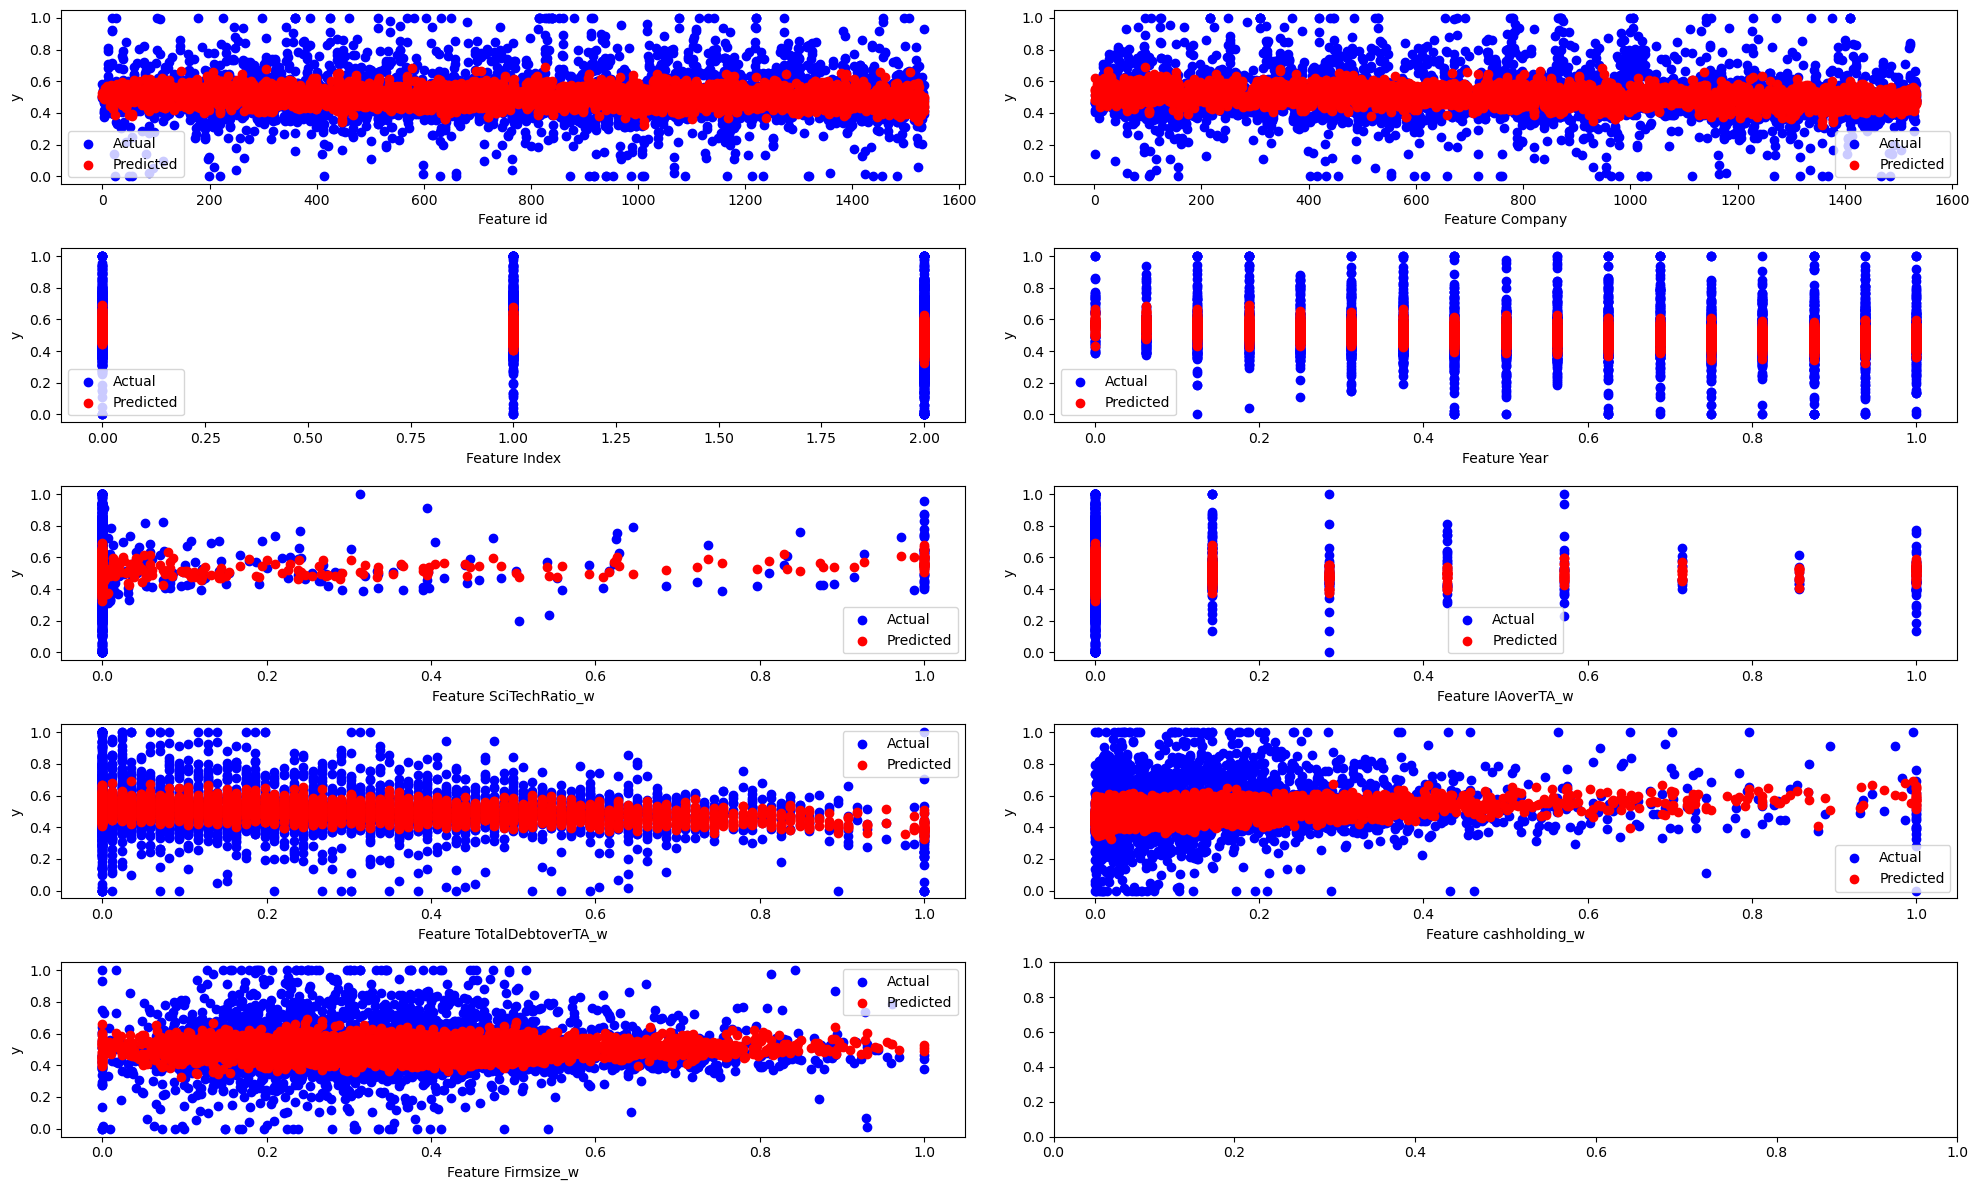

In [30]:
# Hiển thị kết quả dự đoán so với giá trị thực tế
import matplotlib.pyplot as plt

# Vẽ biểu đồ cho tất cả 4 đặc trưng
# Đảm bảo X_test là NumPy array
X_test = np.array(X_test)

# Vẽ biểu đồ cho tất cả 4 đặc trưng
fig, axs = plt.subplots(5, 2, figsize=(20, 12))

for i in range(len(X.columns)):
    row, col = divmod(i, 2)
    axs[row, col].scatter(X_test[:, i], y_test, color='blue', label='Actual')
    axs[row, col].scatter(X_test[:, i], y_pred_linear, color='red', label='Predicted')
    axs[row, col].set_xlabel(f'Feature {X.columns[i]}')
    axs[row, col].set_ylabel('y')
    axs[row, col].legend()

plt.tight_layout()
plt.show()

In [31]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

def analyze_OLS(x,y):

    
    x = sm.add_constant(x)  # Thêm hệ số chặn vào dữ liệu

    # x.dropna(inplace=True)
    # y.dropna(inplace=True)
    # print(x.isnull().sum(),x.shape)

    # x['intercept']=const

  
    model = sm.OLS(y, x,hasconst=True)
    results = model.fit()
    summary = results.summary()
    # print(summary)
    return summary


In [32]:
print(analyze_OLS(X,y))

                            OLS Regression Results                            
Dep. Variable:                  ROA_w   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     267.0
Date:                Fri, 24 May 2024   Prob (F-statistic):               0.00
Time:                        01:16:28   Log-Likelihood:                 10749.
No. Observations:               19782   AIC:                        -2.148e+04
Df Residuals:                   19772   BIC:                        -2.140e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.6100      0.00

In [33]:
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [34]:
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

c:\Users\PC\miniconda3\envs\uii_prj\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
c:\Users\PC\miniconda3\envs\uii_prj\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [35]:
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Ridge Regression - Mean Squared Error: {mse_ridge}, R^2 Score: {r2_ridge}")
print(f"Lasso Regression - Mean Squared Error: {mse_lasso}, R^2 Score: {r2_lasso}")

Ridge Regression - Mean Squared Error: 0.019718575457256495, R^2 Score: 0.10227512774158454
Lasso Regression - Mean Squared Error: 0.021703844196085956, R^2 Score: 0.011892070972215452


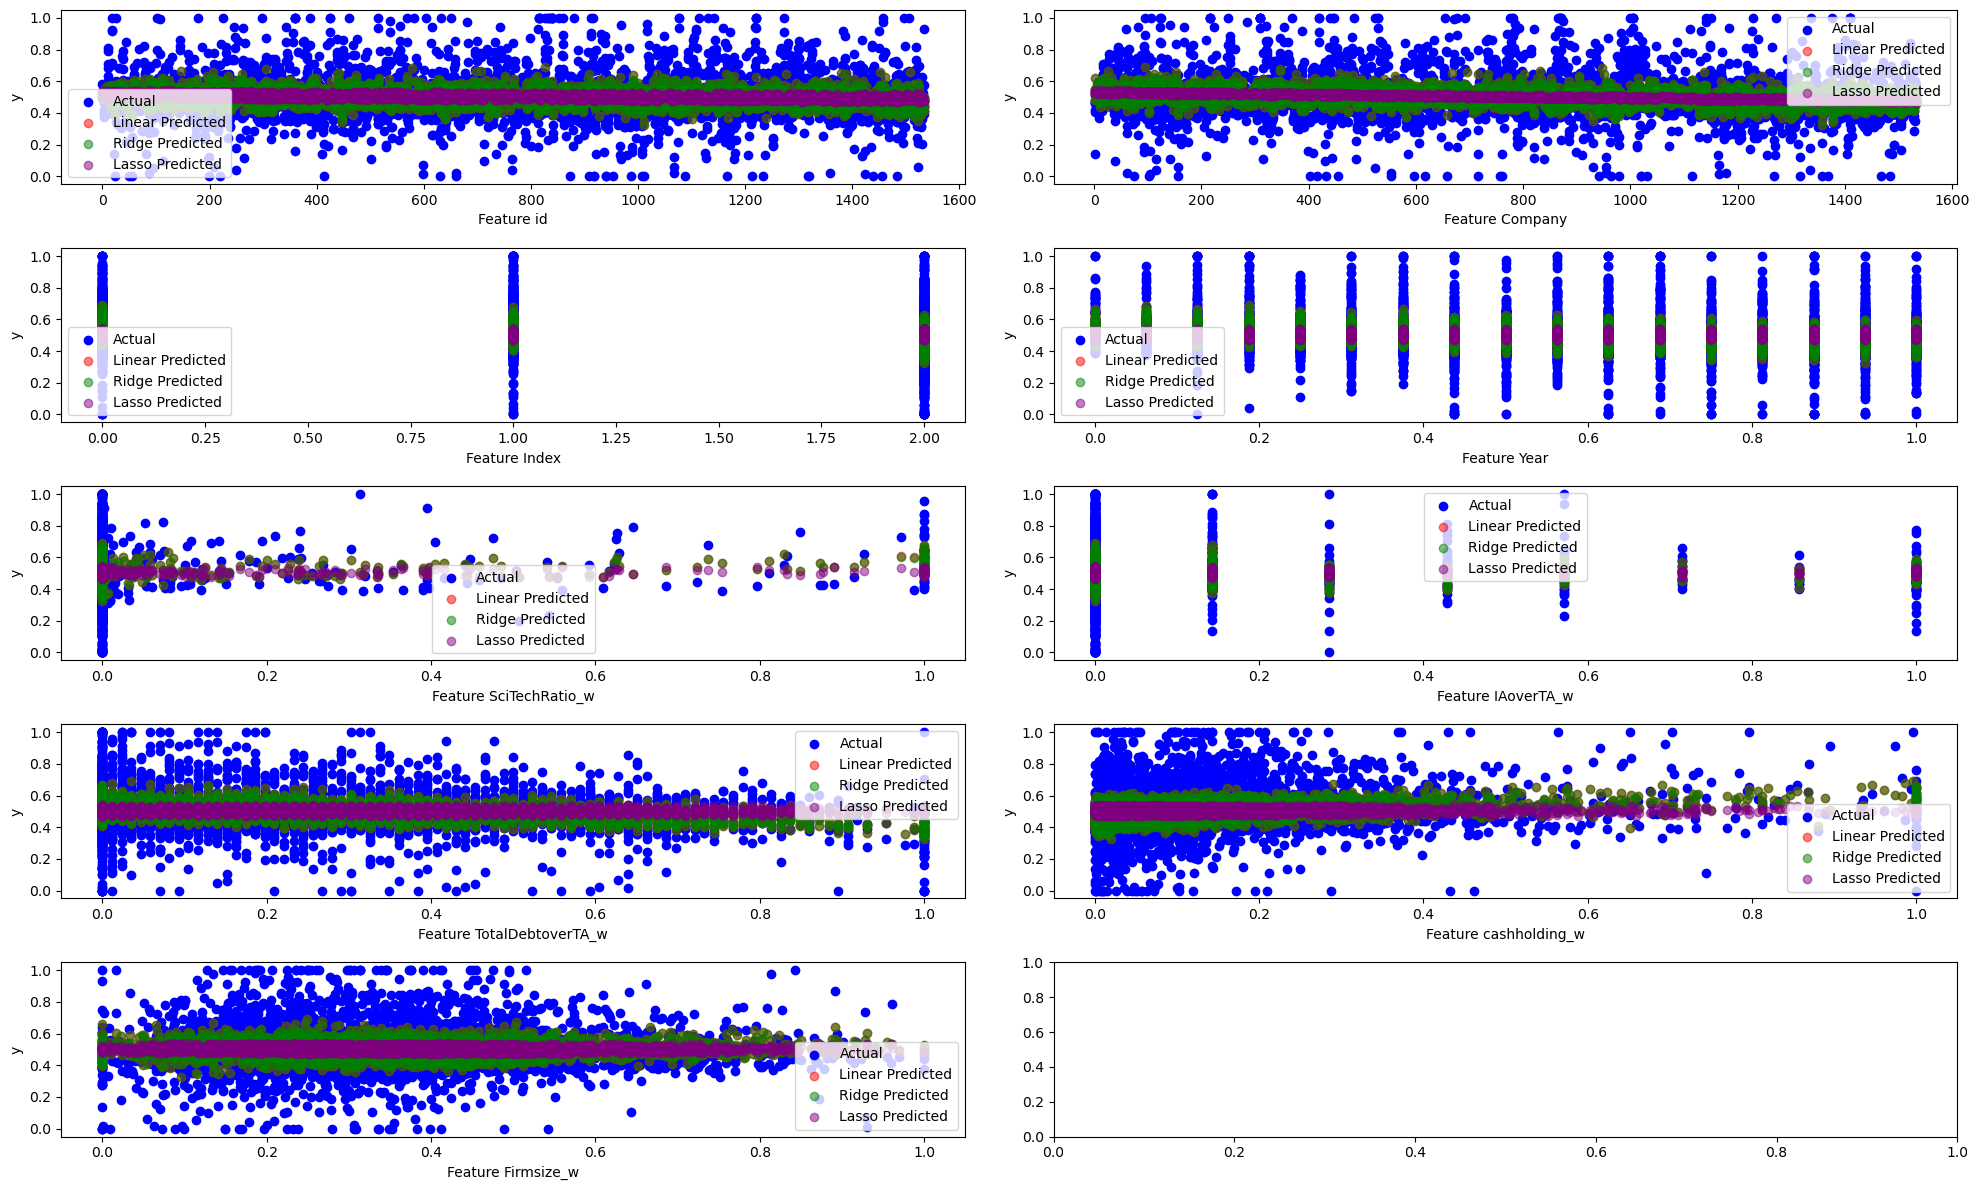

In [36]:
fig, axs = plt.subplots(5, 2, figsize=(20, 12))

for i in range(len(X.columns)):
    row, col = divmod(i, 2)
    axs[row, col].scatter(X_test[:, i], y_test, color='blue', label='Actual')
    axs[row, col].scatter(X_test[:, i], y_pred_linear, color='red', label='Linear Predicted', alpha=0.5)
    axs[row, col].scatter(X_test[:, i], y_pred_ridge, color='green', label='Ridge Predicted', alpha=0.5)
    axs[row, col].scatter(X_test[:, i], y_pred_lasso, color='purple', label='Lasso Predicted', alpha=0.5)
    axs[row, col].set_xlabel(f'Feature {X.columns[i]}')
    axs[row, col].set_ylabel('y')
    axs[row, col].legend()

plt.tight_layout()
plt.show()

In [37]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(mse_svr,r2_svr)

c:\Users\PC\miniconda3\envs\uii_prj\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


0.02146083971764739 0.02295530243319832


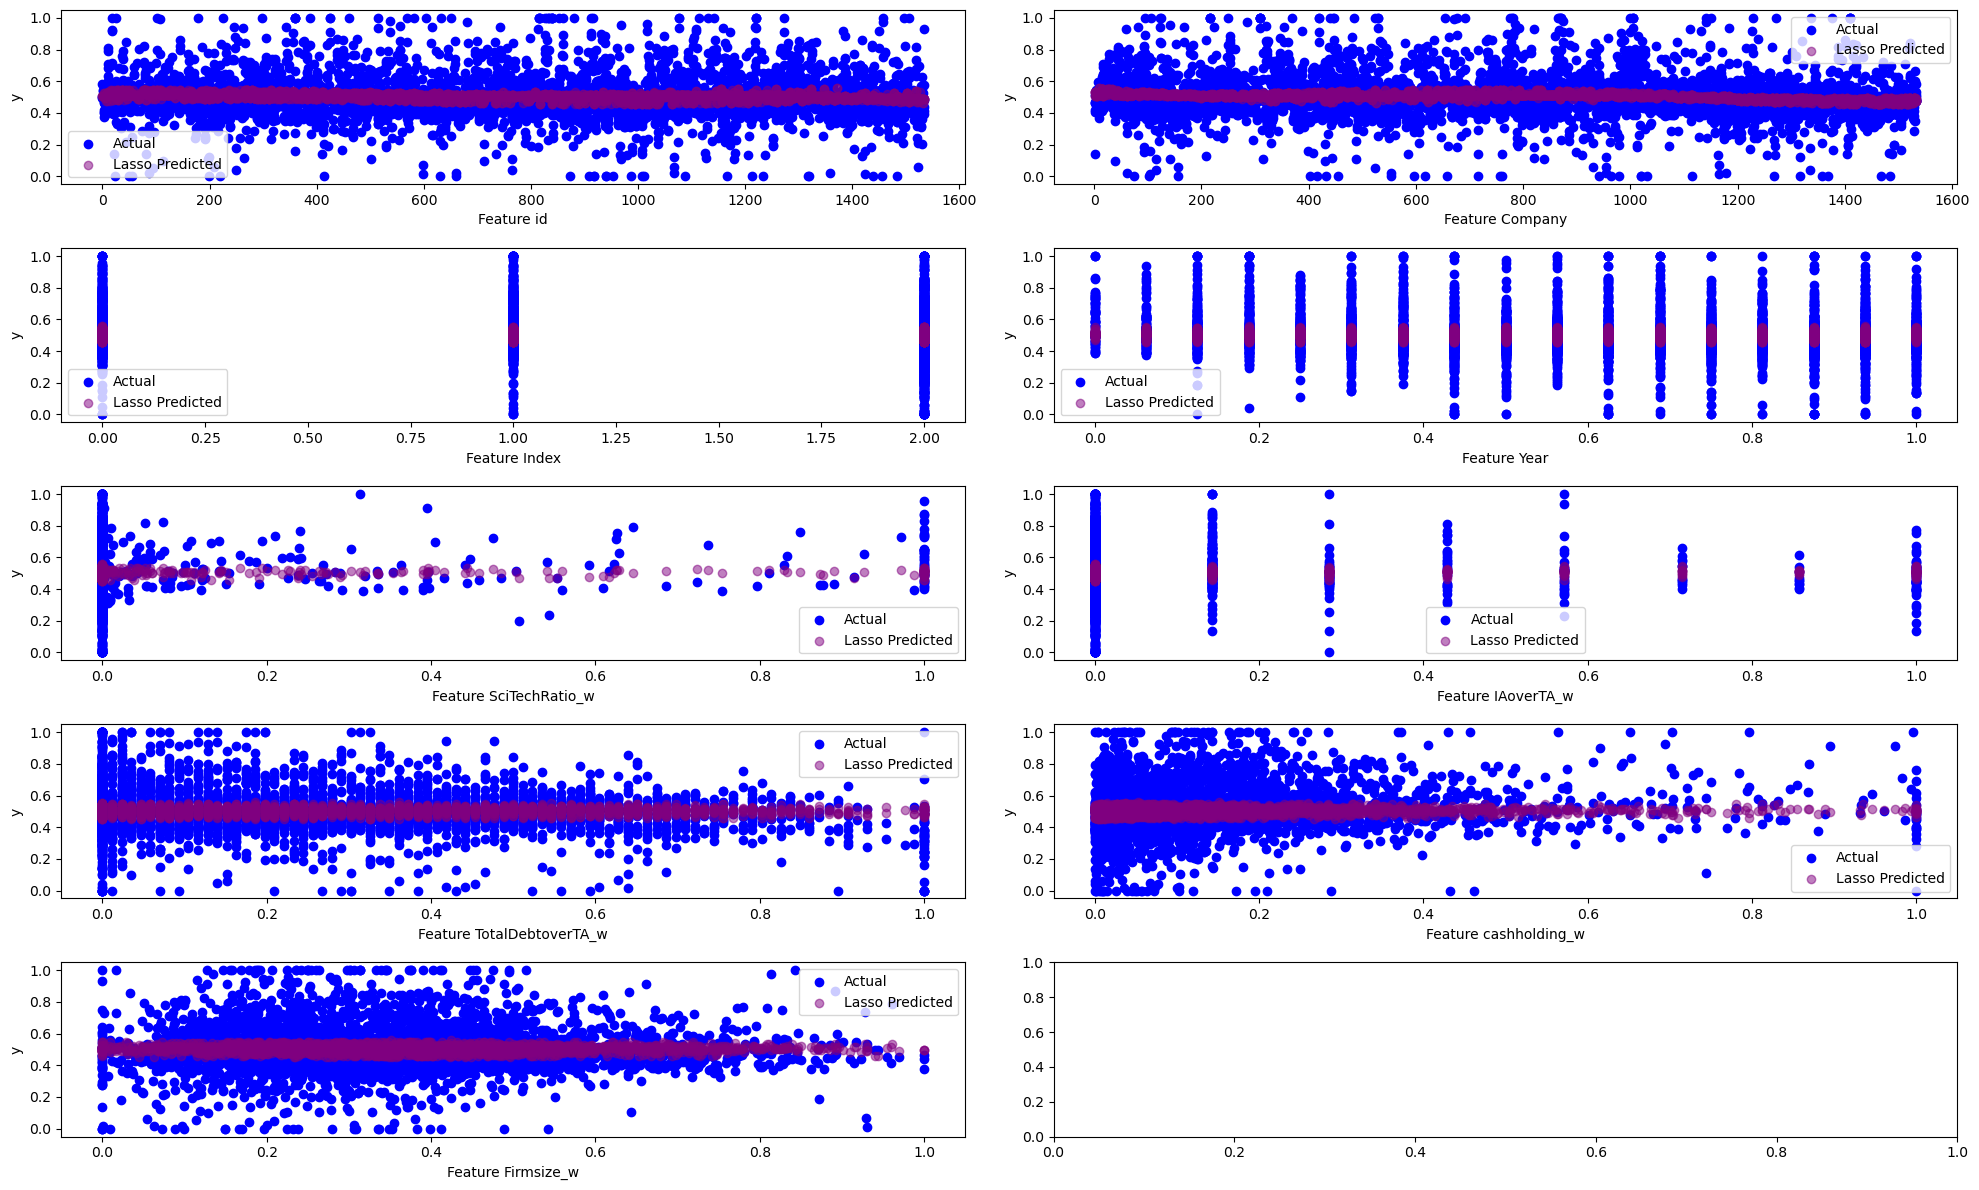

In [38]:
fig, axs = plt.subplots(5, 2, figsize=(20, 12))

for i in range(len(X.columns)):
    row, col = divmod(i, 2)
    axs[row, col].scatter(X_test[:, i], y_test, color='blue', label='Actual')
    axs[row, col].scatter(X_test[:, i], y_pred_svr, color='purple', label='Lasso Predicted', alpha=0.5)
    axs[row, col].set_xlabel(f'Feature {X.columns[i]}')
    axs[row, col].set_ylabel('y')
    axs[row, col].legend()

plt.tight_layout()
plt.show()

c:\Users\PC\miniconda3\envs\uii_prj\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\PC\miniconda3\envs\uii_prj\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
c:\Users\PC\miniconda3\envs\uii_prj\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
c:\Users\PC\miniconda3\envs\uii_prj\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(
c:\Users\PC\miniconda3\envs\uii_prj\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\PC\miniconda3\envs\uii_prj\lib\site-packages\sklearn

Linear Regression - Mean Squared Error: 0.01971878319114381, R^2 Score: 0.10226567026947364
Ridge Regression - Mean Squared Error: 0.019718575457256495, R^2 Score: 0.10227512774158454
Lasso Regression - Mean Squared Error: 0.021703844196085956, R^2 Score: 0.011892070972215452
Elastic Net Regression - Mean Squared Error: 0.021699986802793253, R^2 Score: 0.012067685986010379
Polynomial Regression - Mean Squared Error: 0.018645555452988214, R^2 Score: 0.15112636186600392
Bayesian Ridge Regression - Mean Squared Error: 0.019717904520827678, R^2 Score: 0.10230567337208196
SGD Regression - Mean Squared Error: 1.8351606474873257e+29, R^2 Score: -8.354910634444219e+30
PCR - Mean Squared Error: 0.02059961978506296, R^2 Score: 0.06216394383032531
PLS - Mean Squared Error: 0.019718278069101834, R^2 Score: 0.10228866689119165


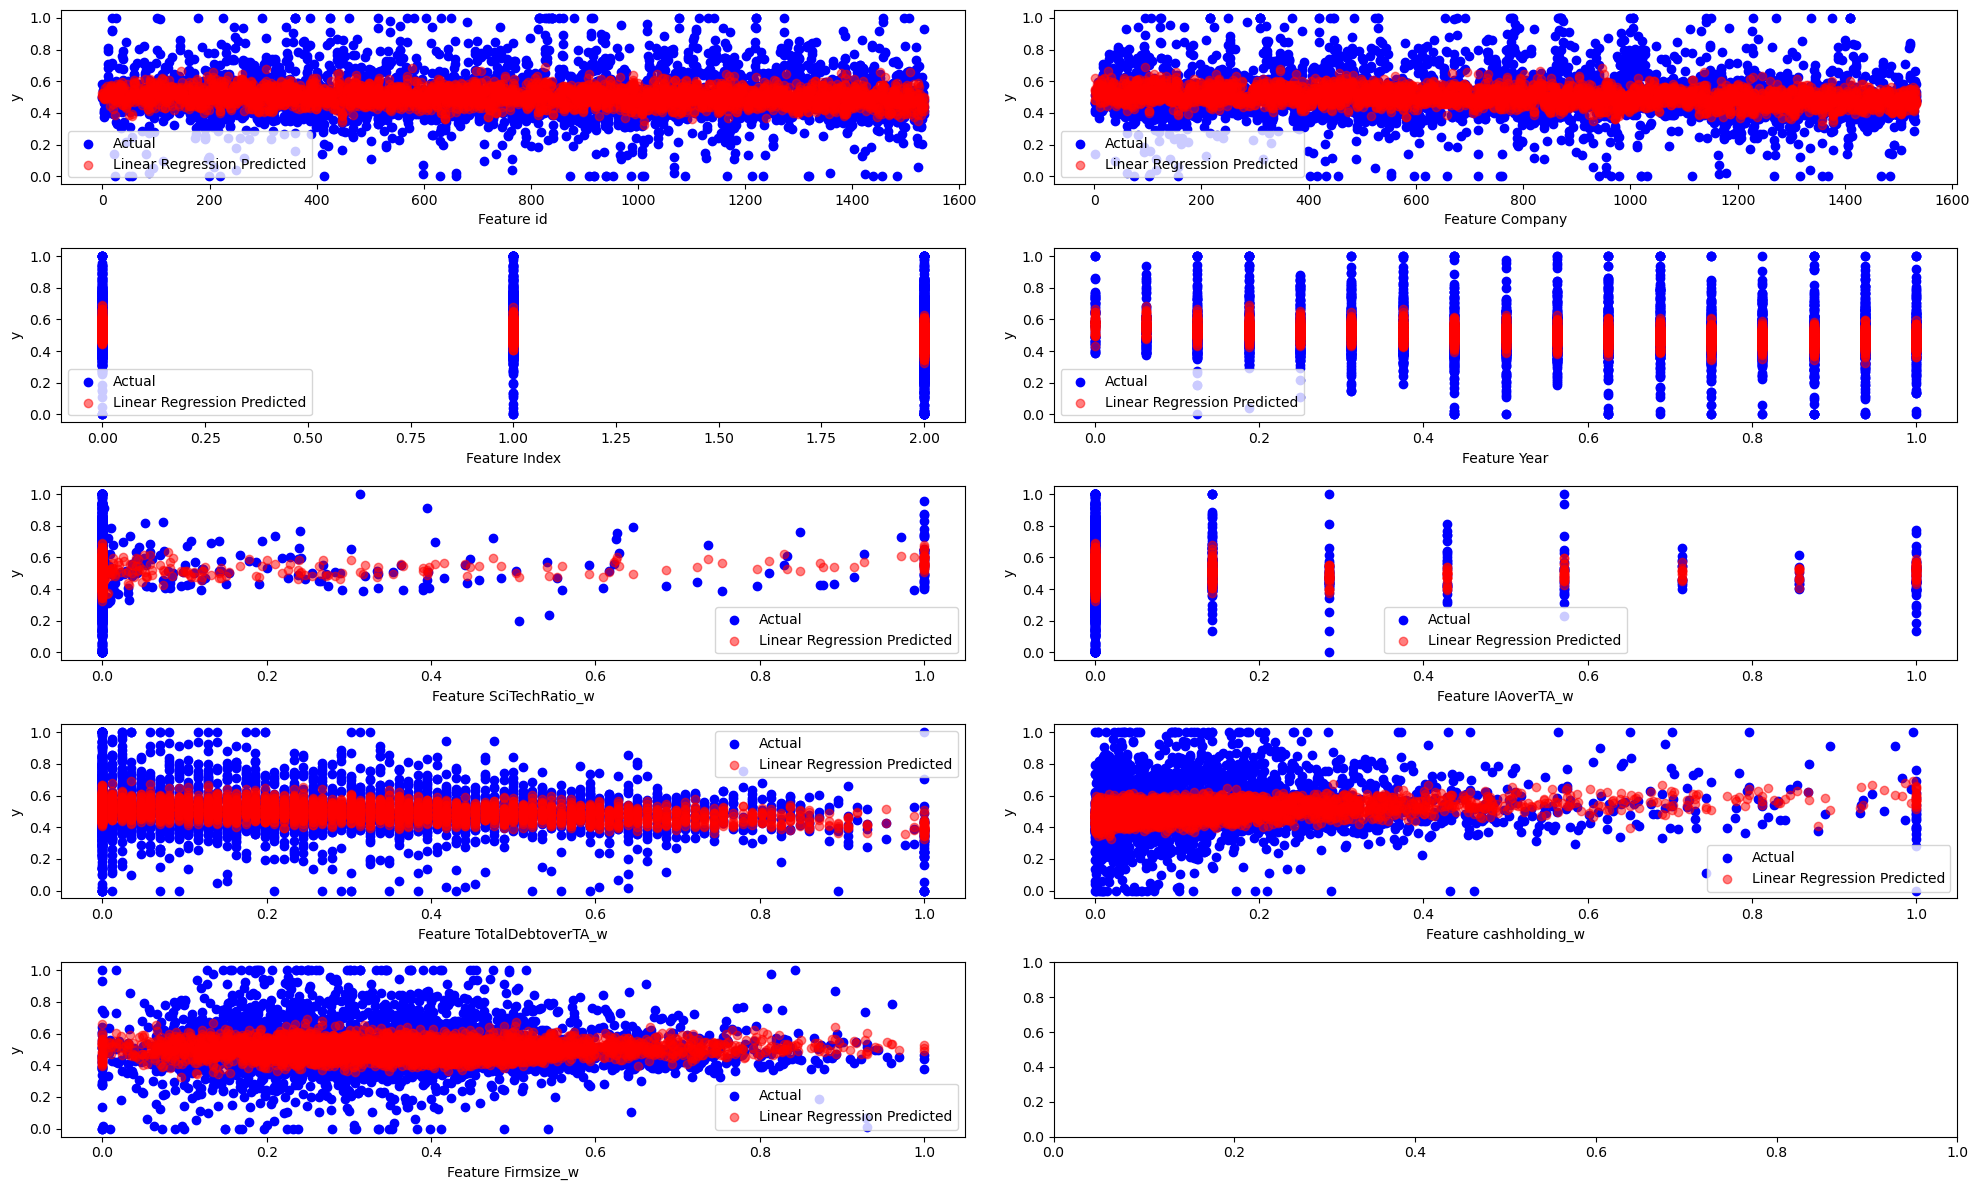

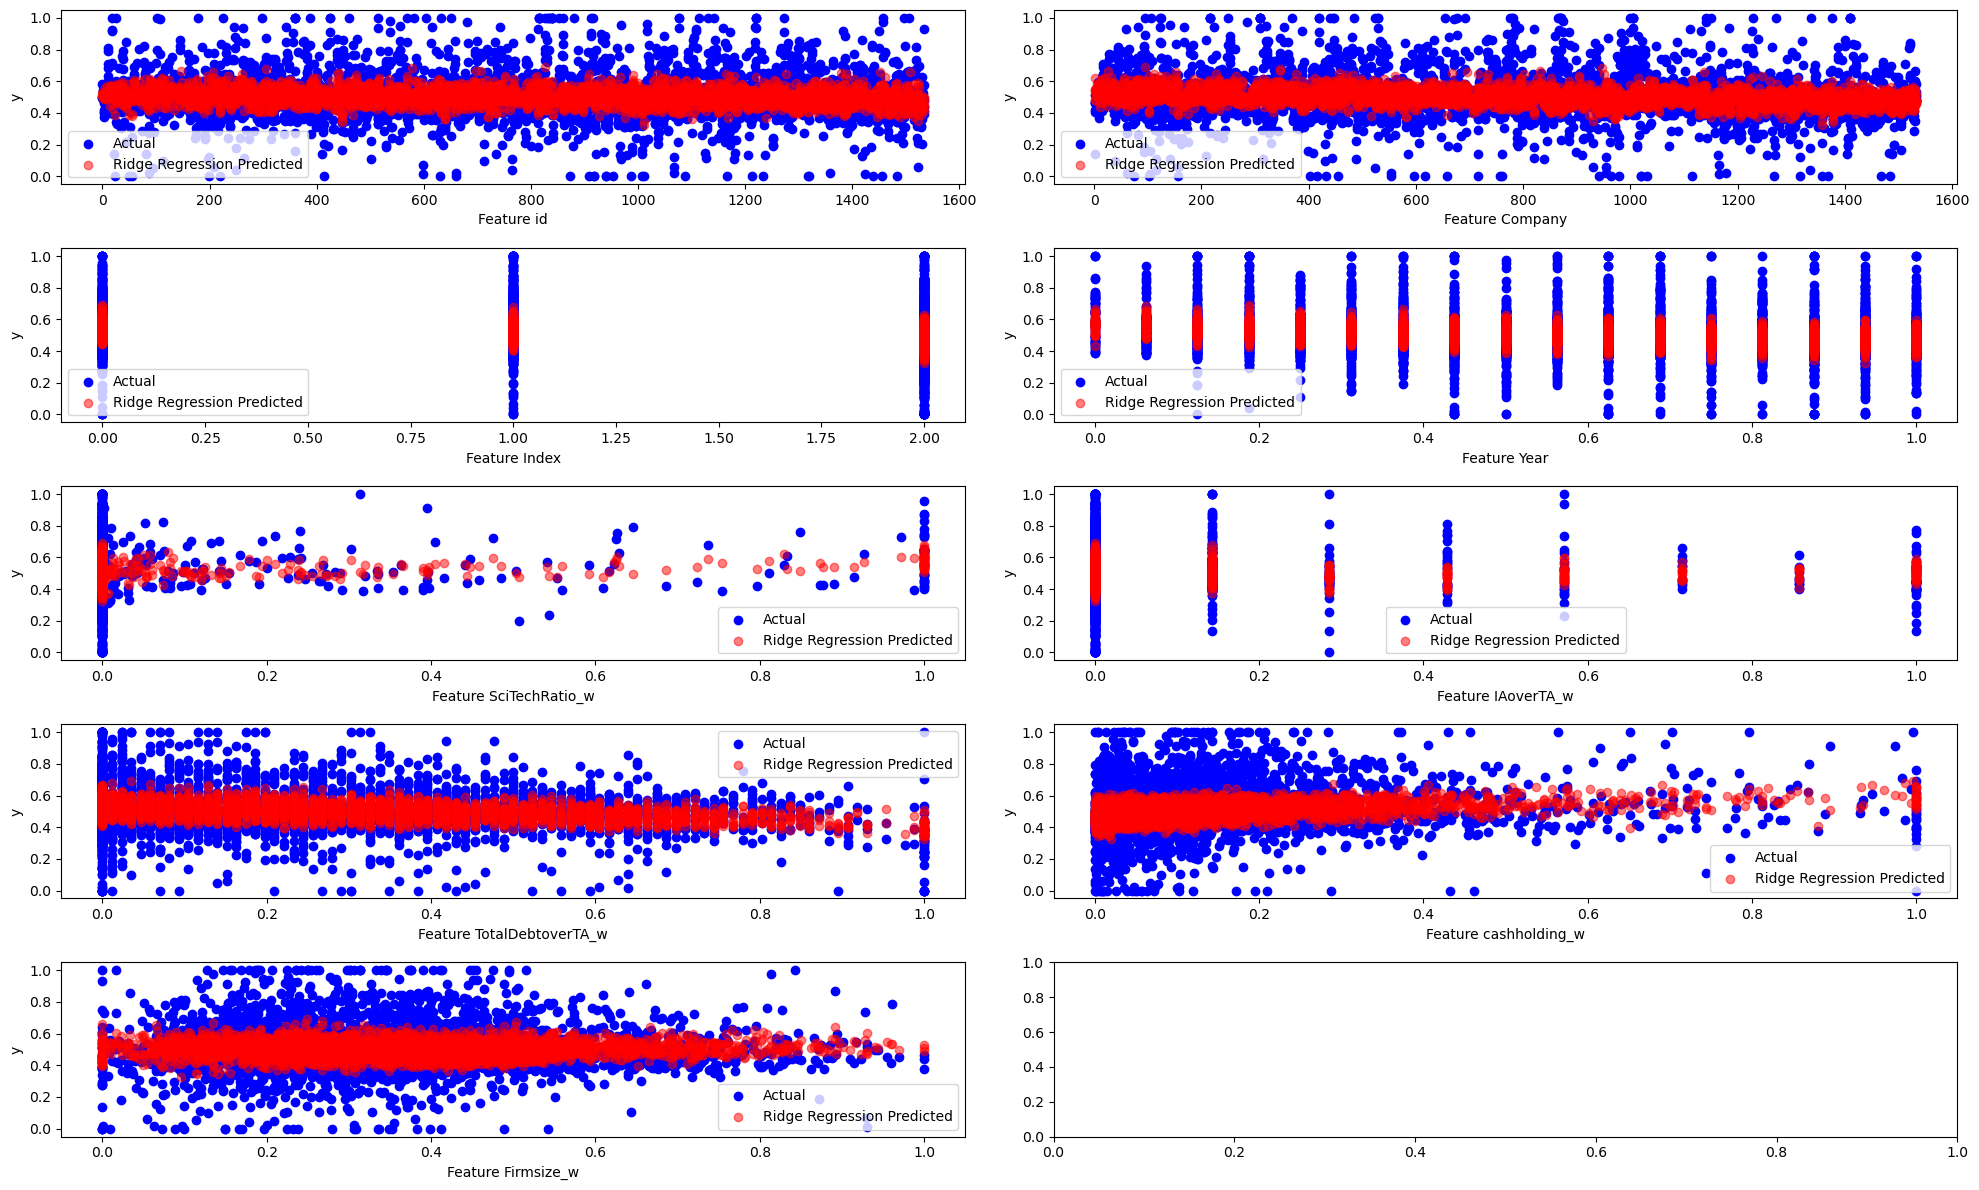

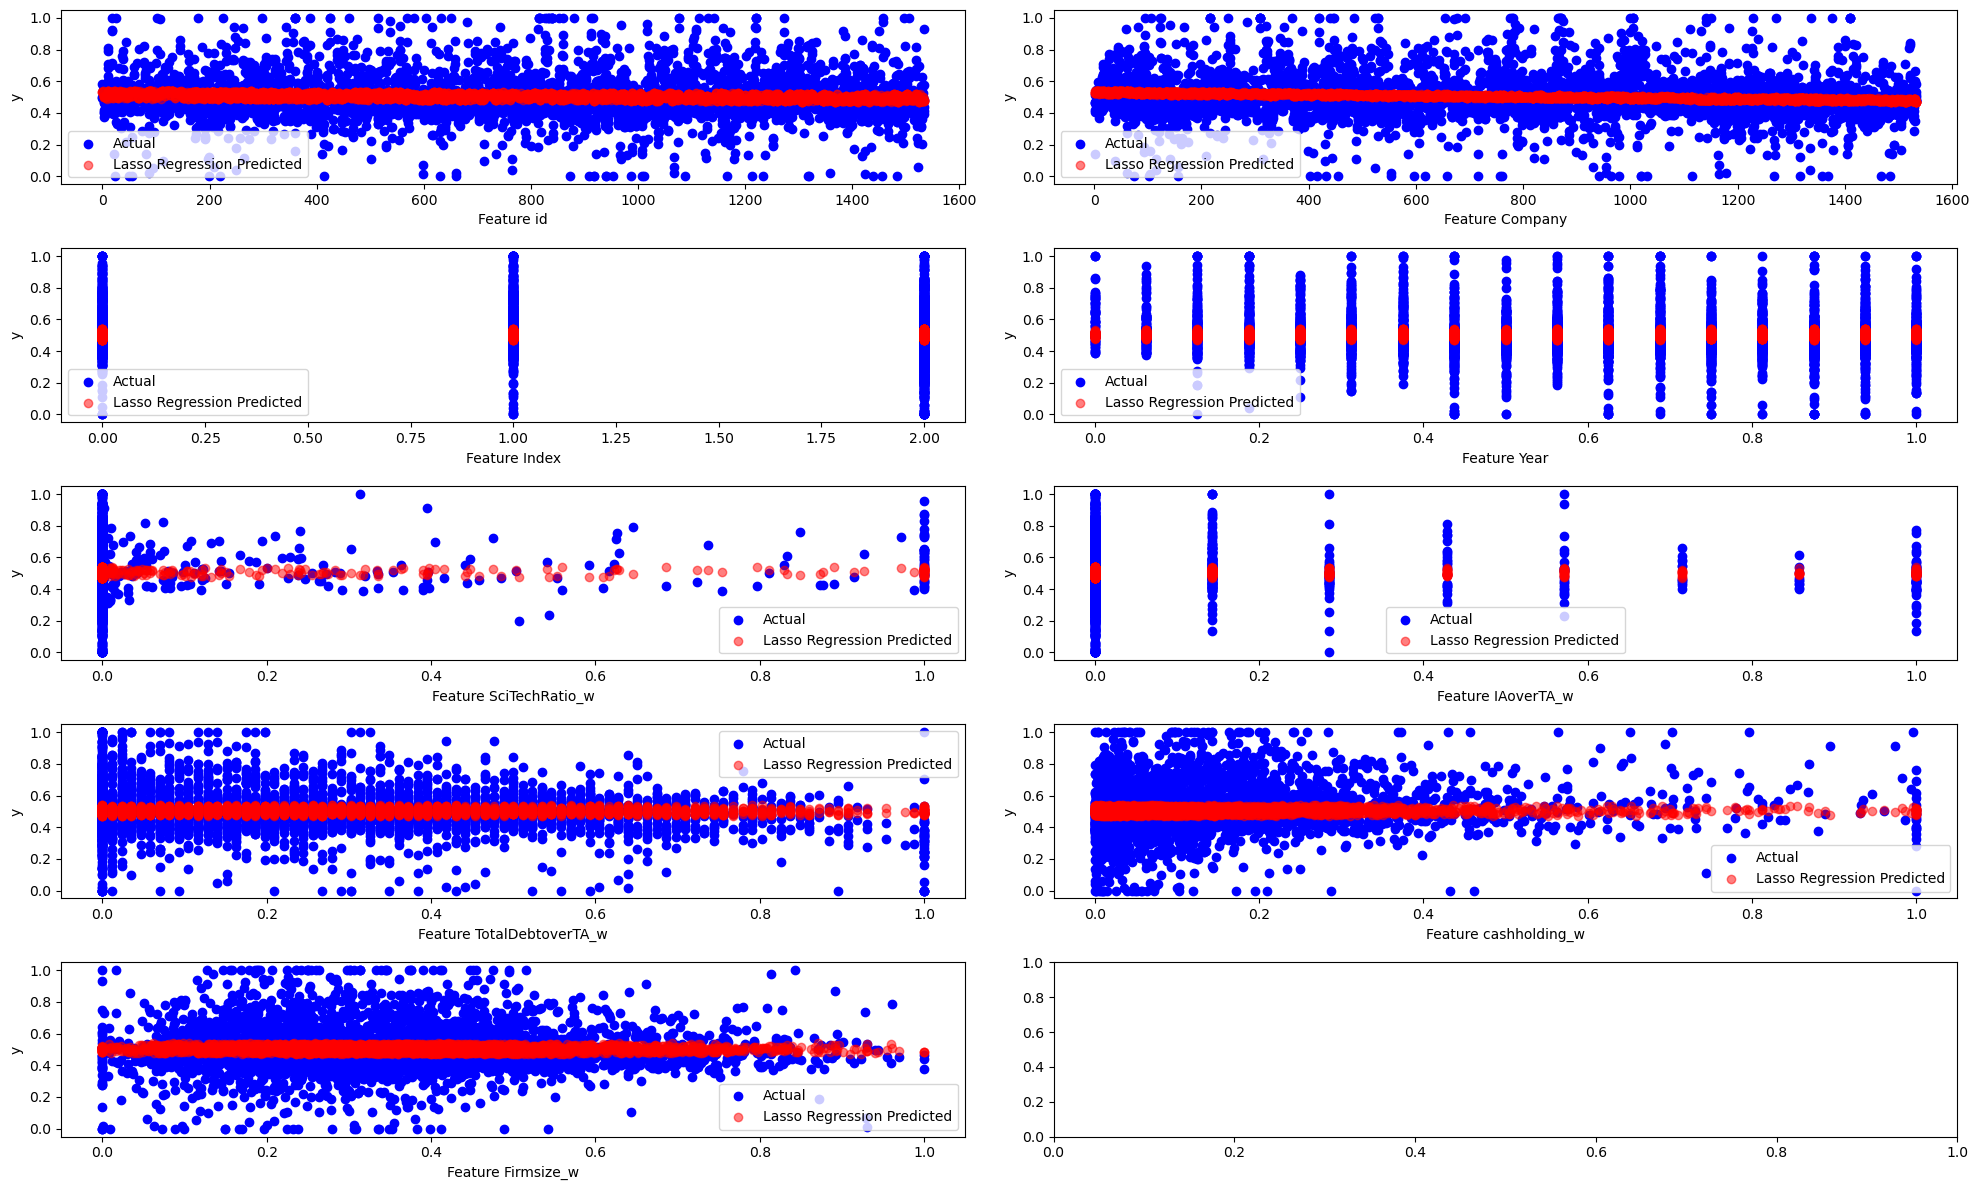

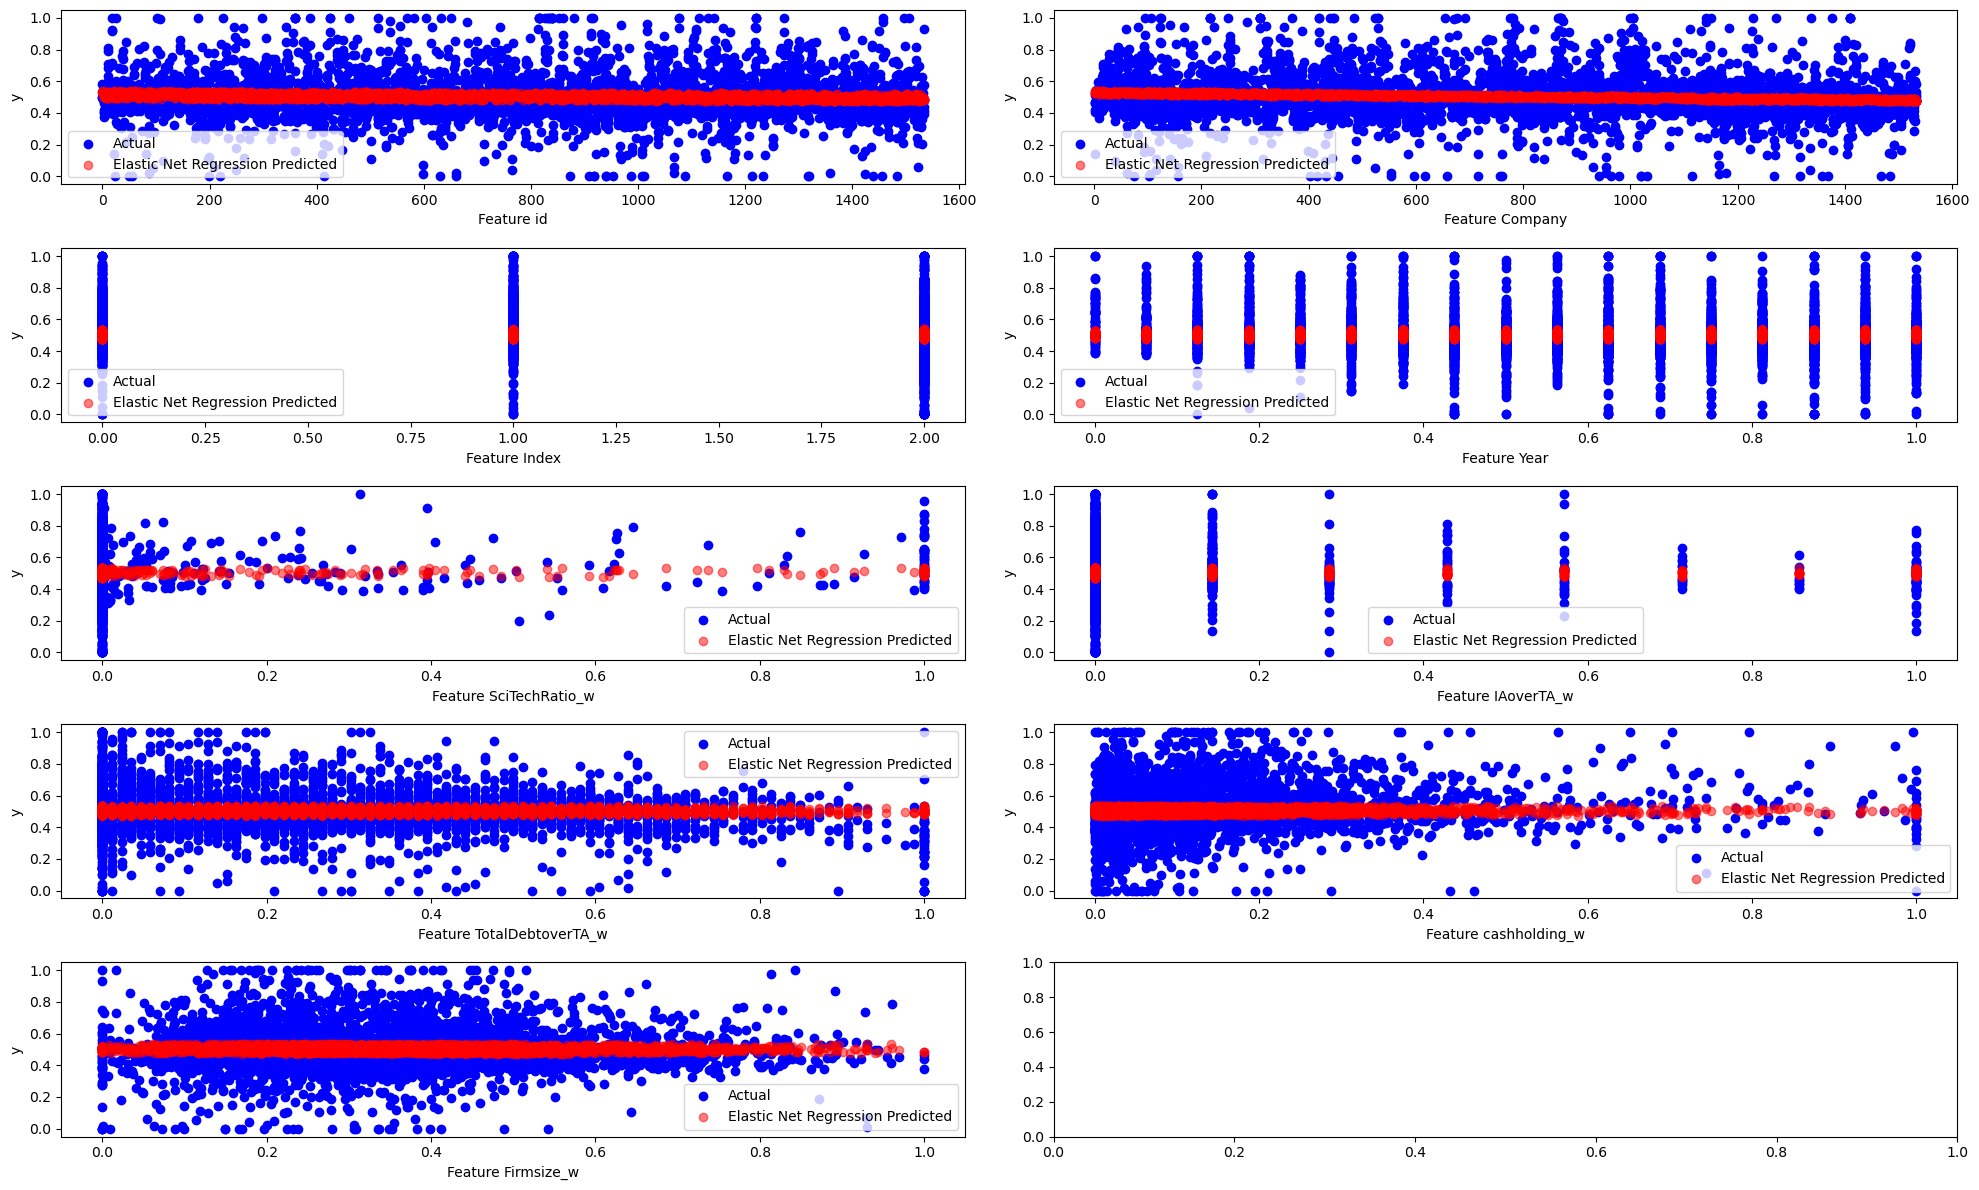

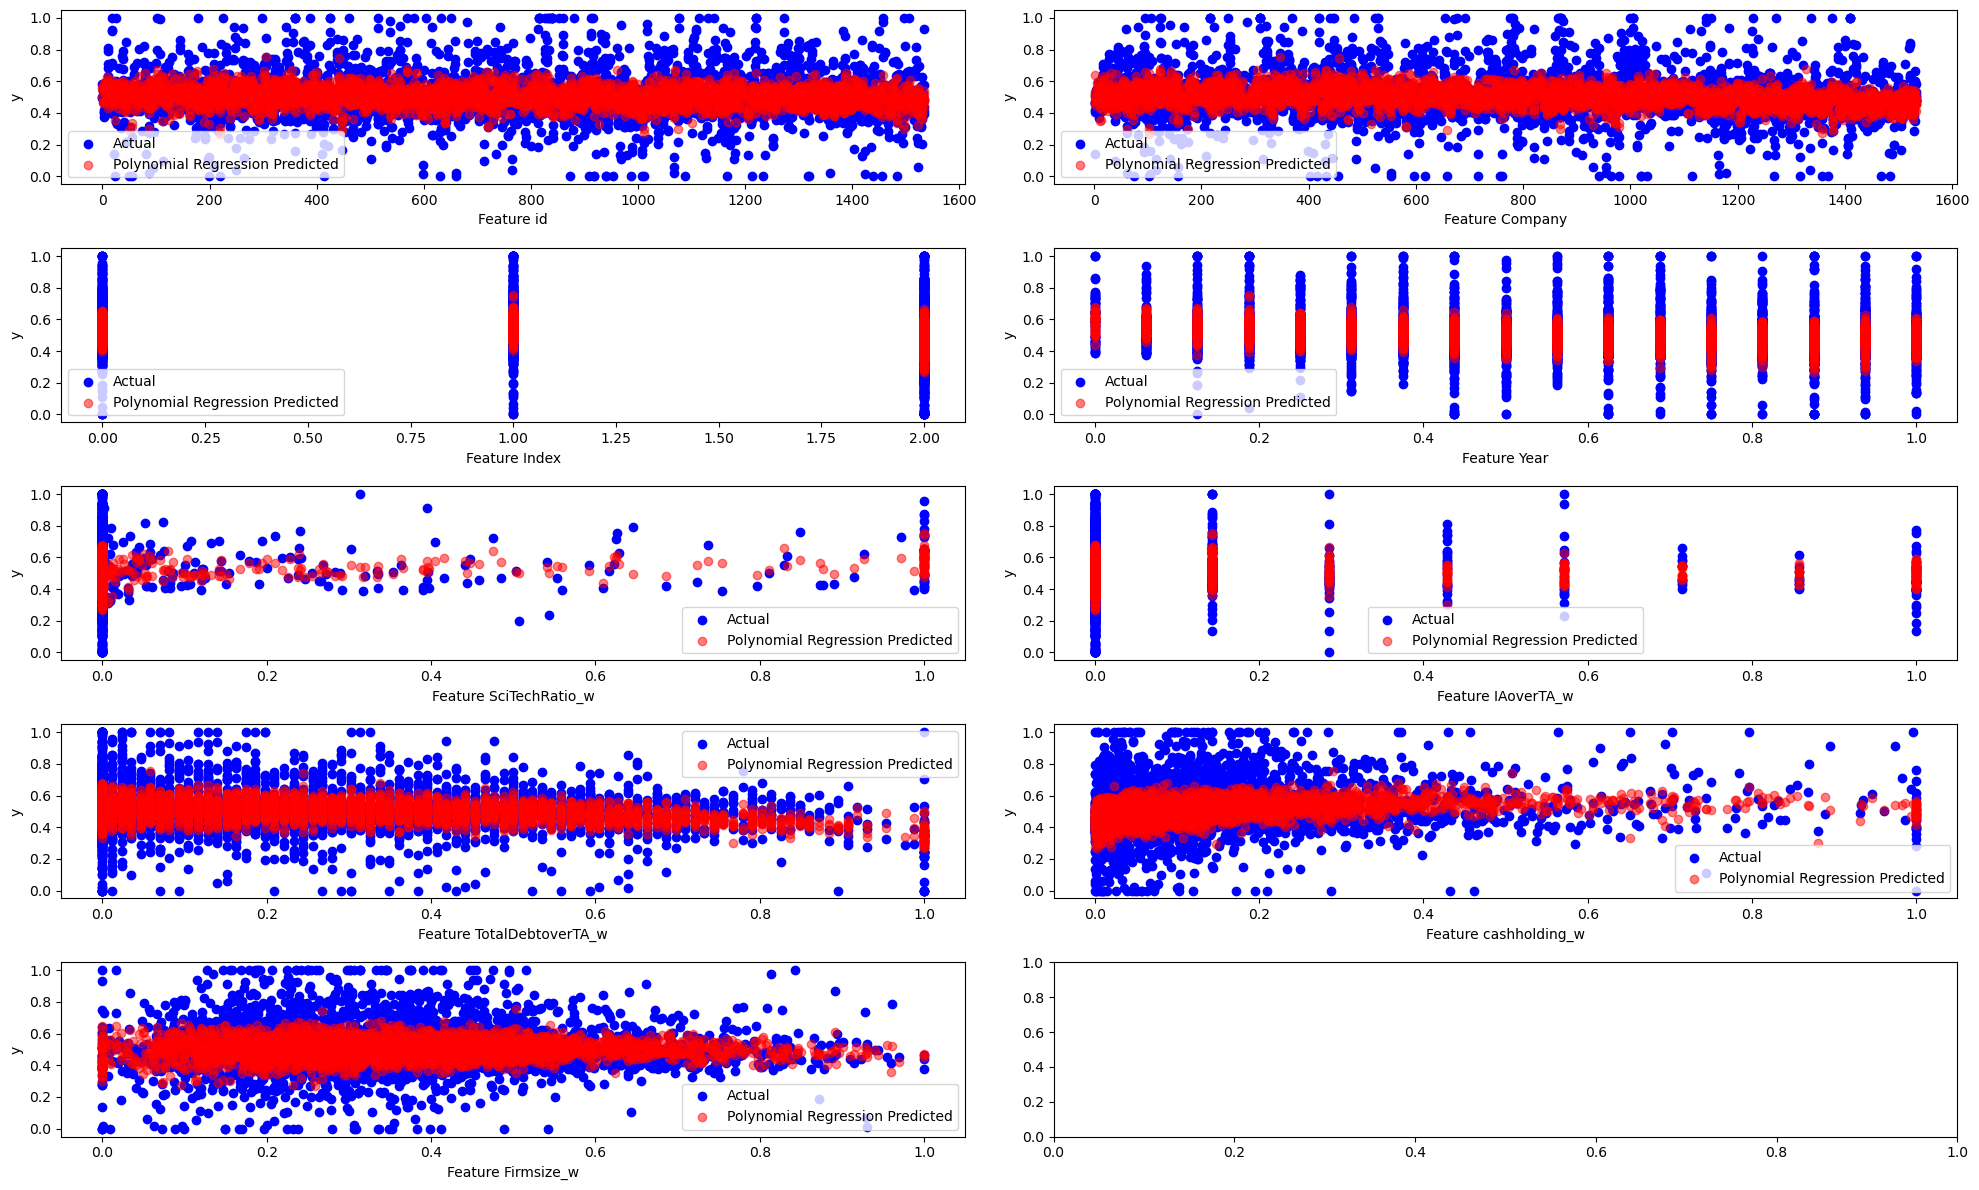

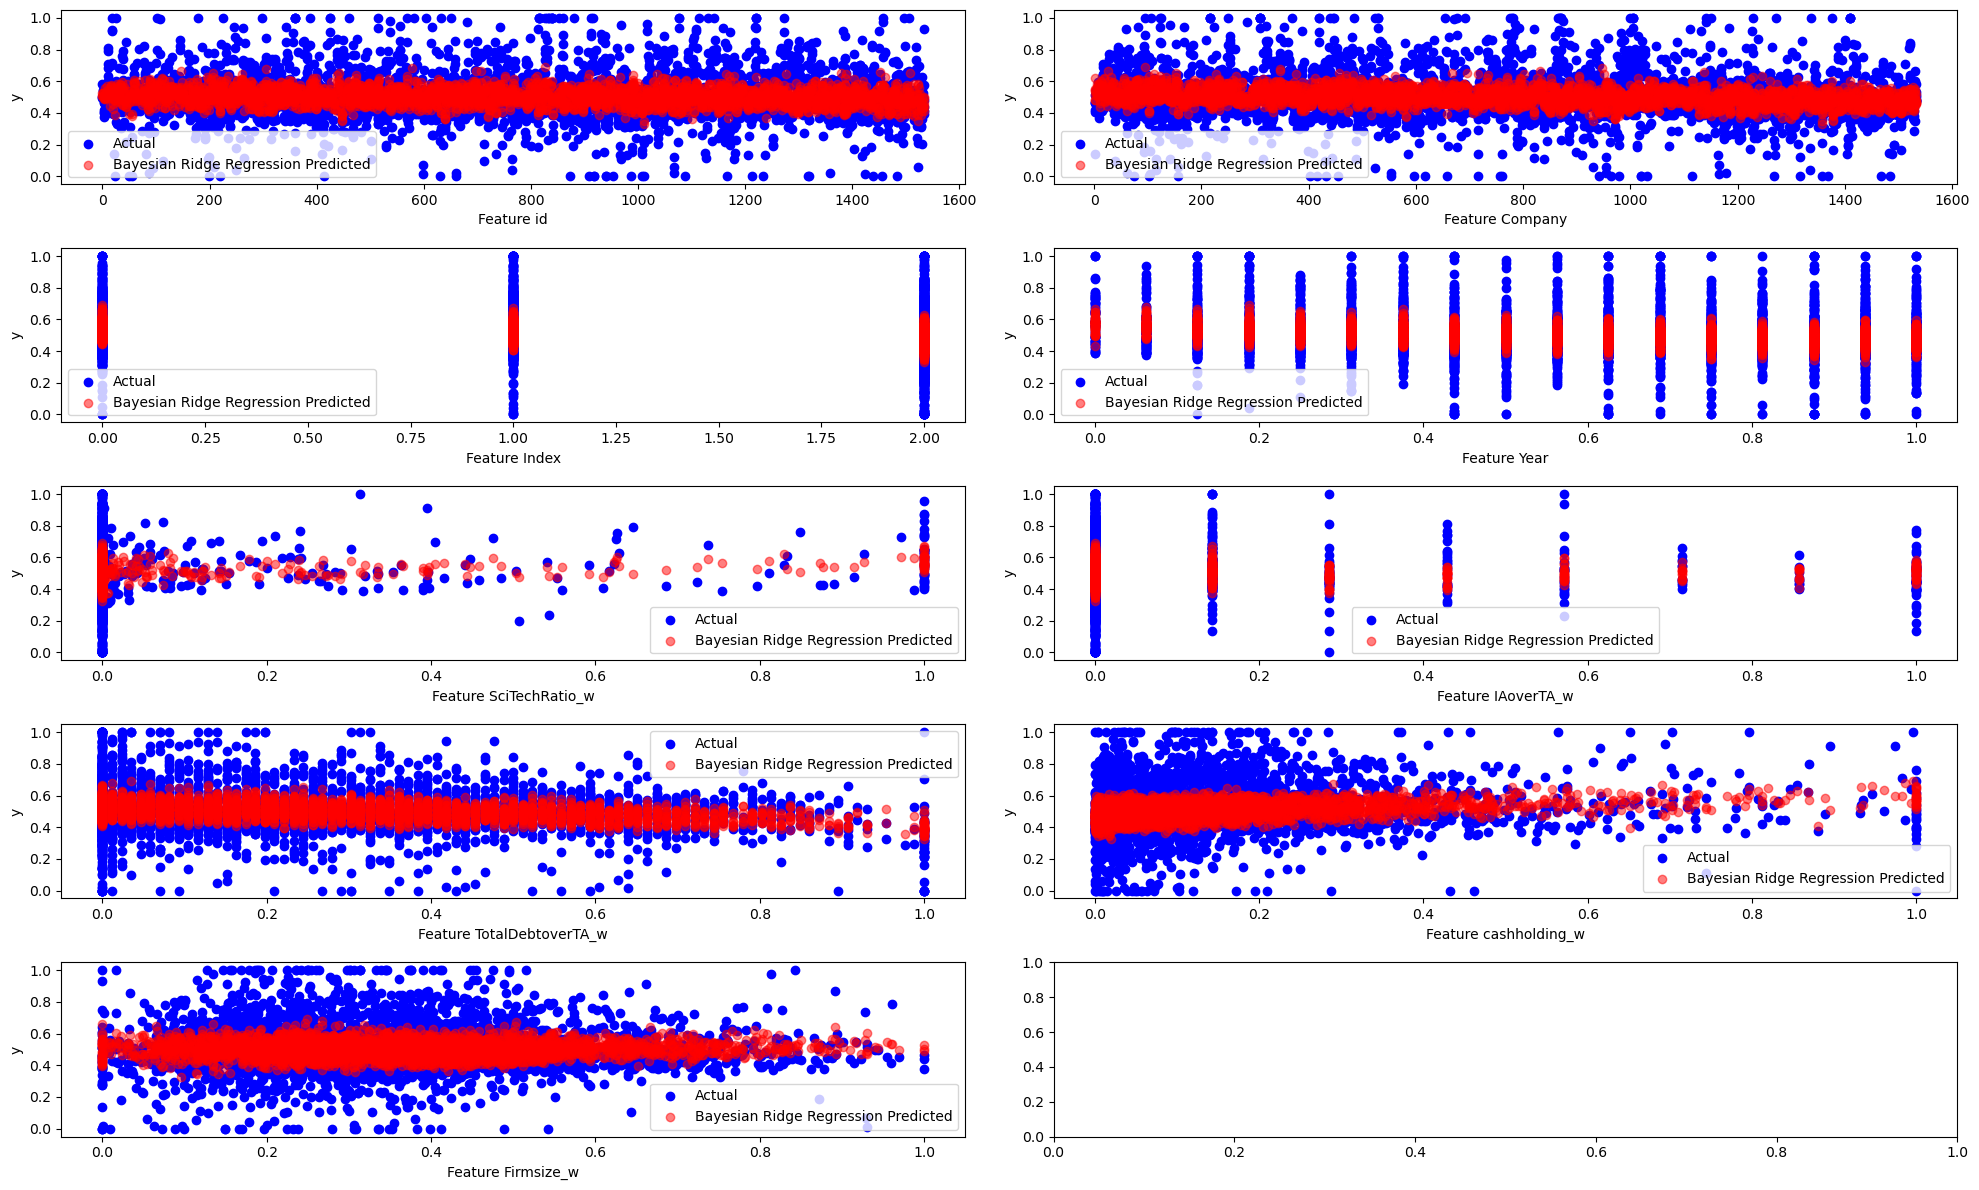

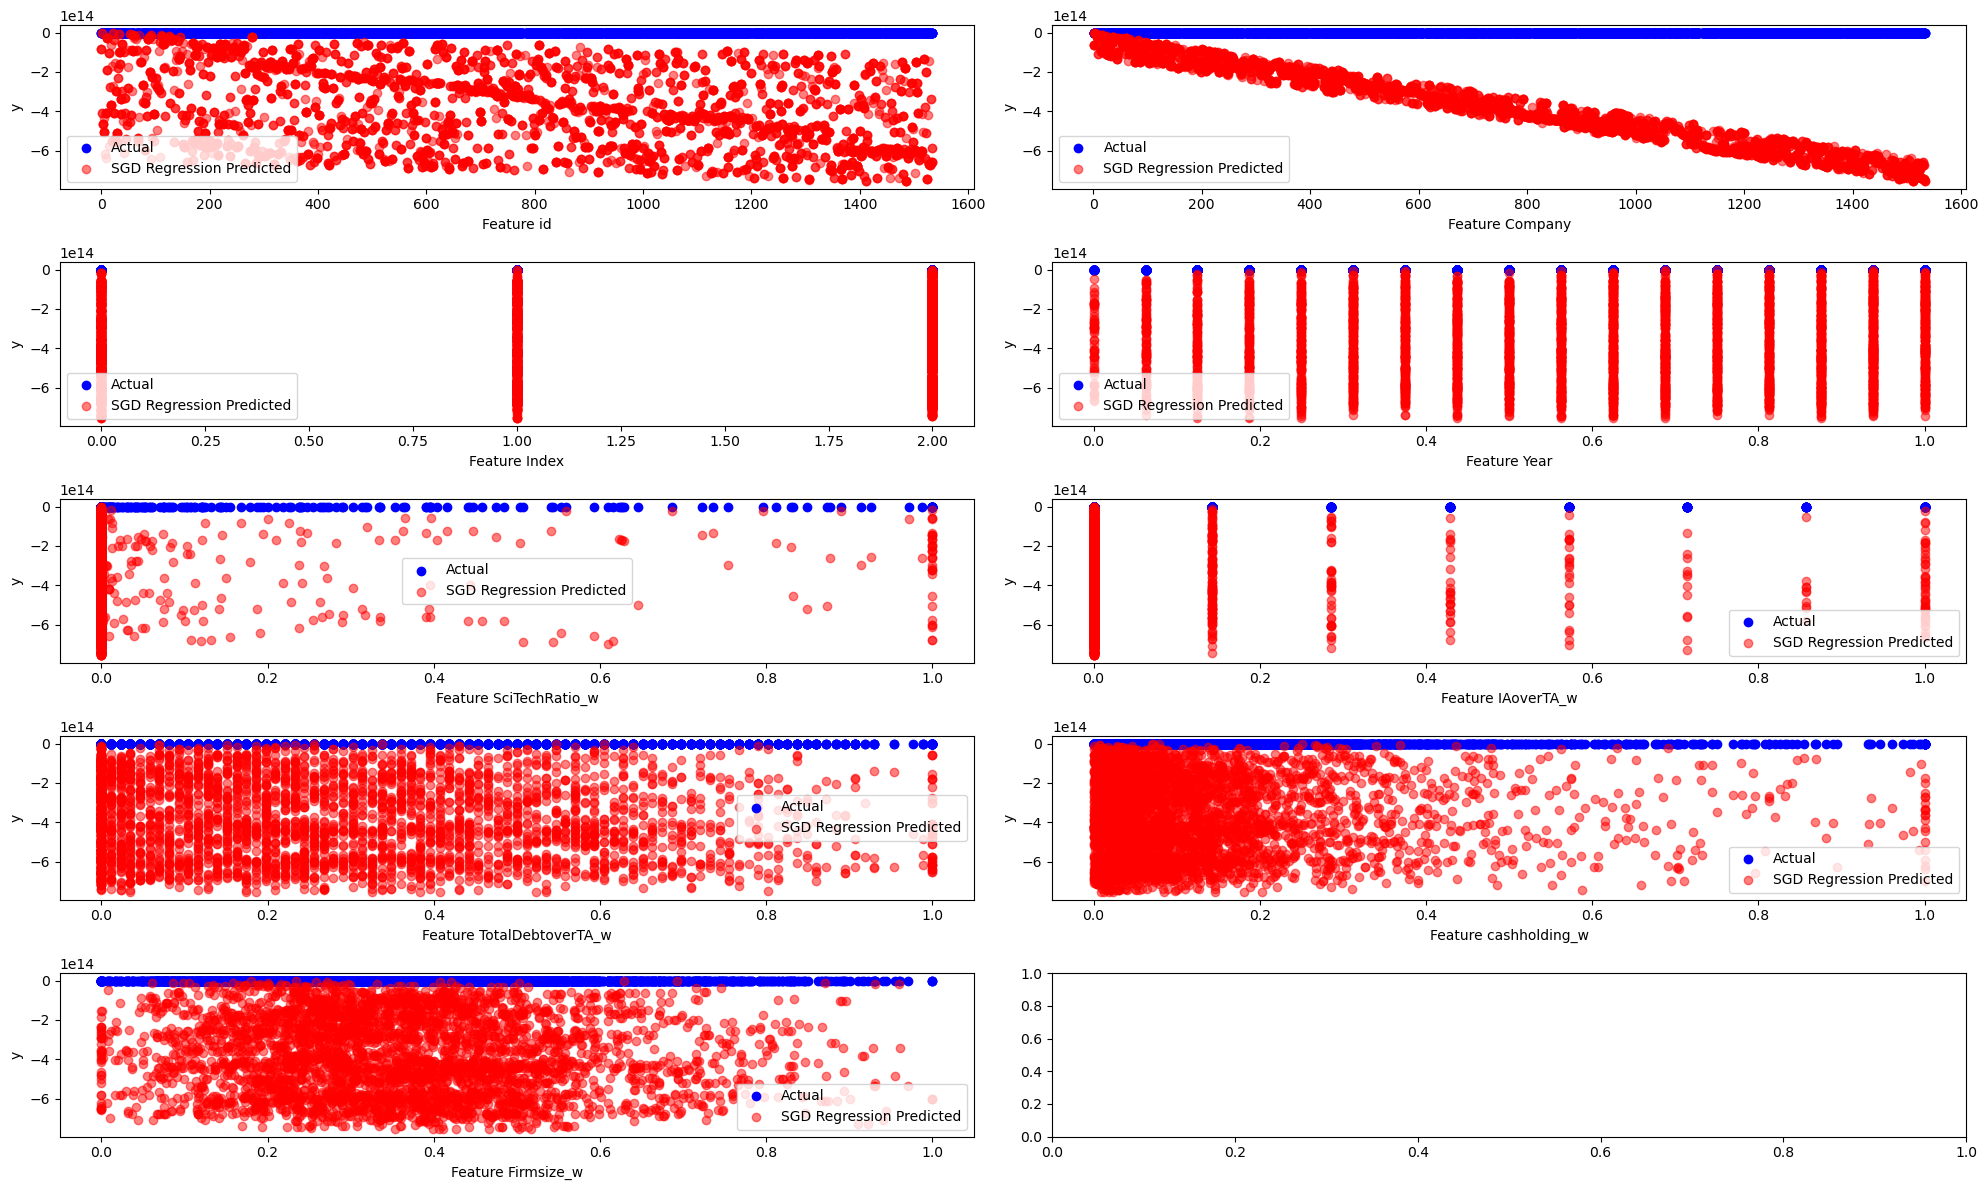

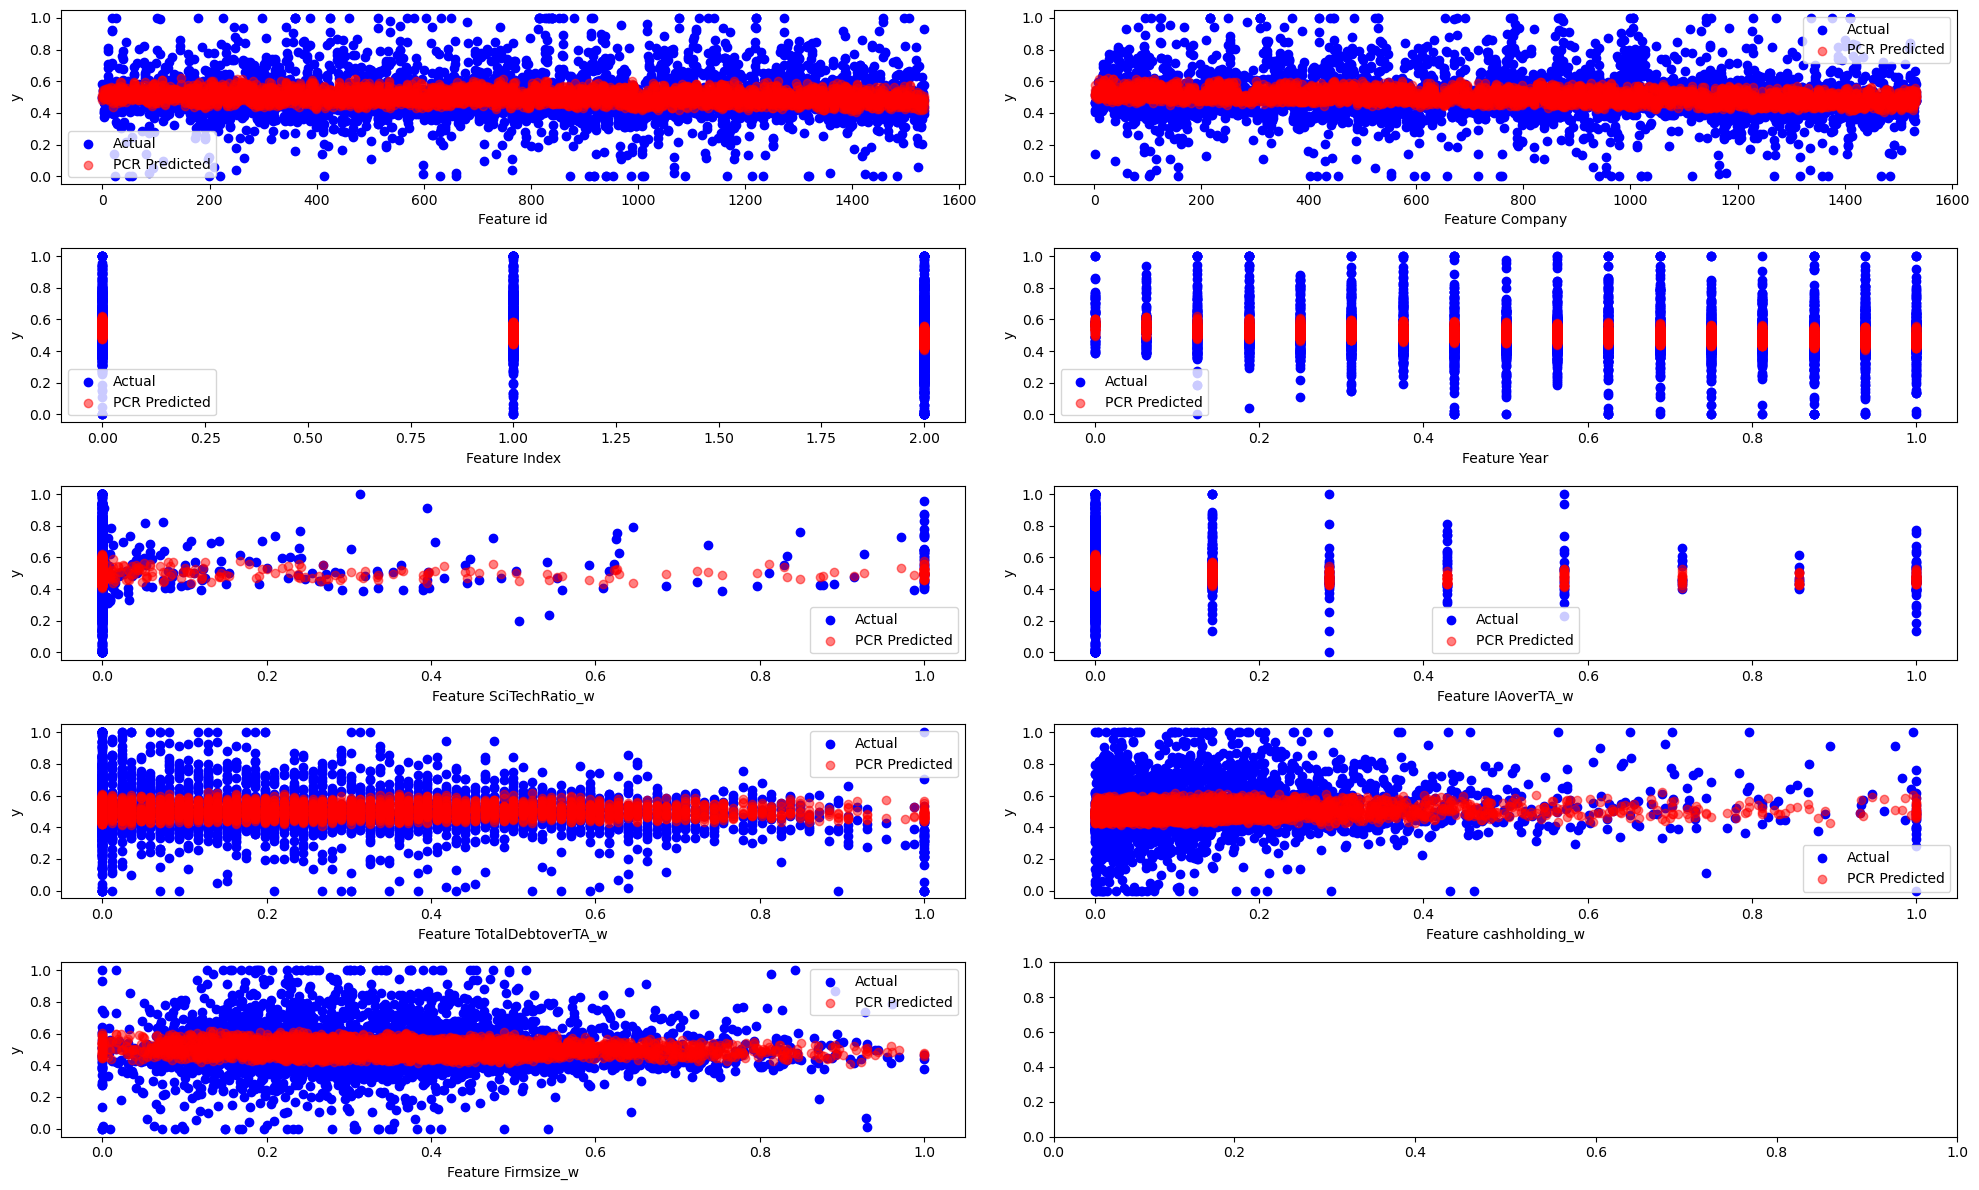

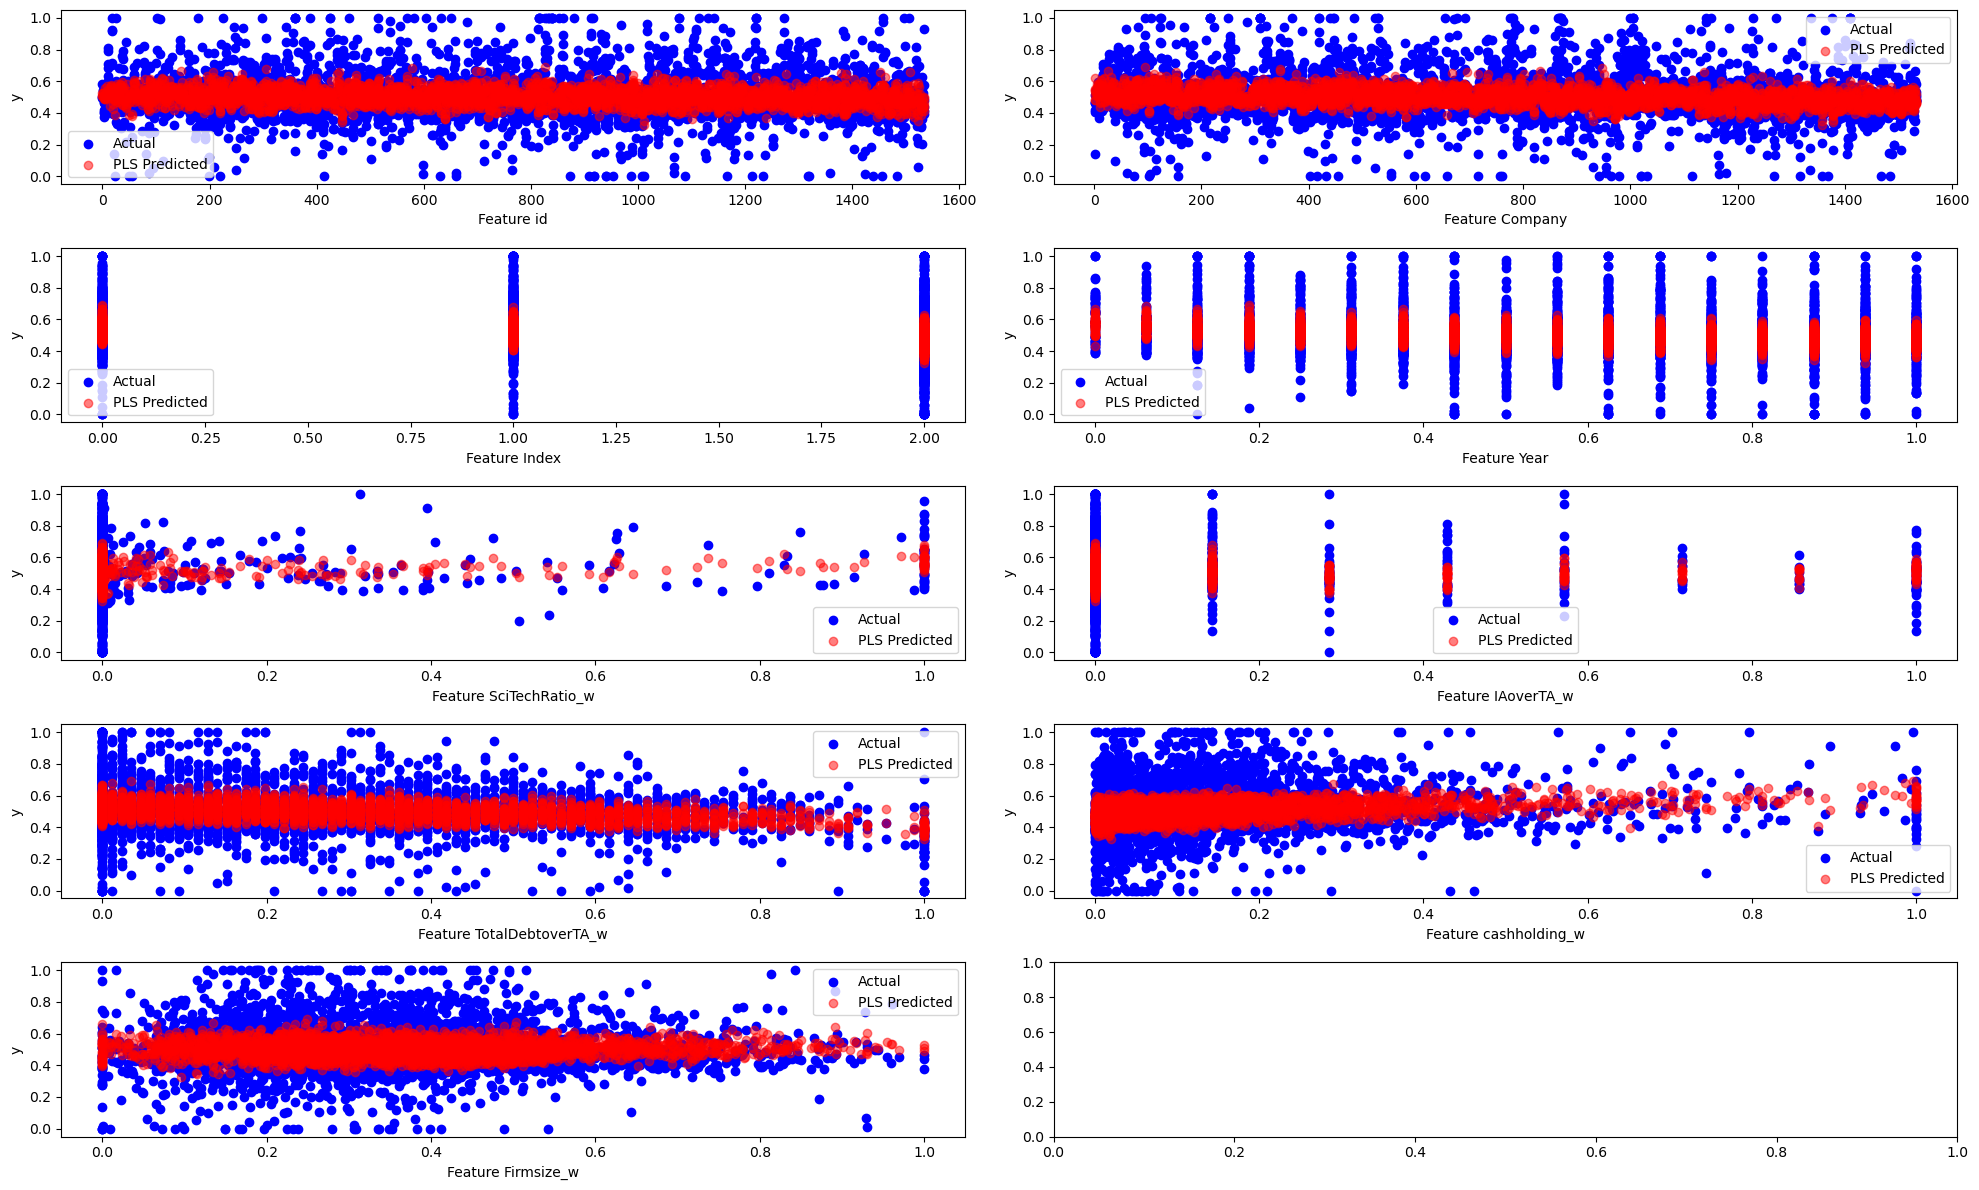

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score

# Giả sử bạn đã có X_train, X_test, y_train, y_test
# X_train, X_test, y_train, y_test = ...

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

# Ridge Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)

# Lasso Regression
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)

# Elastic Net Regression
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)
y_pred_en = elastic_net.predict(X_test)

# Polynomial Regression
poly = PolynomialFeatures(degree=2)
poly_reg = make_pipeline(poly, LinearRegression())
poly_reg.fit(X_train, y_train)
y_pred_poly = poly_reg.predict(X_test)

# Bayesian Ridge Regression
bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(X_train, y_train)
y_pred_br = bayesian_ridge.predict(X_test)

# Stochastic Gradient Descent Regression
sgd = SGDRegressor(max_iter=1000, tol=1e-3)
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)

# Principal Component Regression
pca = PCA(n_components=4)
pca_reg = make_pipeline(pca, LinearRegression())
pca_reg.fit(X_train, y_train)
y_pred_pca = pca_reg.predict(X_test)

# Partial Least Squares Regression
pls = PLSRegression(n_components=4)
pls.fit(X_train, y_train)
y_pred_pls = pls.predict(X_test)

# Calculate Metrics
models = {
    'Linear Regression': y_pred_linear,
    'Ridge Regression': y_pred_ridge,
    'Lasso Regression': y_pred_lasso,
    'Elastic Net Regression': y_pred_en,
    'Polynomial Regression': y_pred_poly,
    'Bayesian Ridge Regression': y_pred_br,
    'SGD Regression': y_pred_sgd,
    'PCR': y_pred_pca,
    'PLS': y_pred_pls
}

# Print MSE and R^2 for all models
for name, y_pred in models.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - Mean Squared Error: {mse}, R^2 Score: {r2}")

def show_result(y,name):
    fig, axs = plt.subplots(5, 2, figsize=(20, 12))

    for i in range(len(X.columns)):
        row, col = divmod(i, 2)
        axs[row, col].scatter(X_test[:, i], y_test, color='blue', label='Actual')
        axs[row, col].scatter(X_test[:, i], y, color='red', label=f'{name} Predicted', alpha=0.5)
        # axs[row, col].scatter(X_test[:, i], y_pred_ridge, color='green', label='Ridge Predicted', alpha=0.5)
        # axs[row, col].scatter(X_test[:, i], y_pred_lasso, color='purple', label='Lasso Predicted', alpha=0.5)
        # axs[row, col].scatter(X_test[:, i], y_pred_en, color='yellow', label='Elastic Net Regression Predicted', alpha=0.5)
        # axs[row, col].scatter(X_test[:, i], y_pred_poly, color='orange', label='Polynomial Regression Predicted', alpha=0.5)
        # axs[row, col].scatter(X_test[:, i], y_pred_br, color='gray', label='Bayesian Ridge Regression Predicted', alpha=0.5)
        # axs[row, col].scatter(X_test[:, i], y_pred_sgd, color='pink', label='SGD Predicted', alpha=0.5)
        # axs[row, col].scatter(X_test[:, i], y_pred_pca, color='brown', label='PCR Predicted', alpha=0.5)
        # axs[row, col].scatter(X_test[:, i], y_pred_pls, color='black', label='PLS Predicted', alpha=0.5)
        axs[row, col].set_xlabel(f'Feature {X.columns[i]}')
        axs[row, col].set_ylabel('y')
        axs[row, col].legend()

    plt.tight_layout()
    plt.show()    

# # Plotting
# fig, axs = plt.subplots(3, 3, figsize=(18, 12))
# fig.suptitle('Comparison of Regression Models', fontsize=16)

# for i, (name, y_pred) in enumerate(models.items()):
#     row, col = divmod(i, 3)
#     axs[row, col].scatter(X_test[:, 0], y_test, color='blue', label='Actual')
#     axs[row, col].scatter(X_test[:, 0], y_pred, label=f'{name} Predicted', alpha=0.5)
#     axs[row, col].set_xlabel('Feature 0')
#     axs[row, col].set_ylabel('y')
#     axs[row, col].legend()
#     axs[row, col].set_title(name)

# plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.show()
for name,y_pred in models.items():
    show_result(y_pred,name)

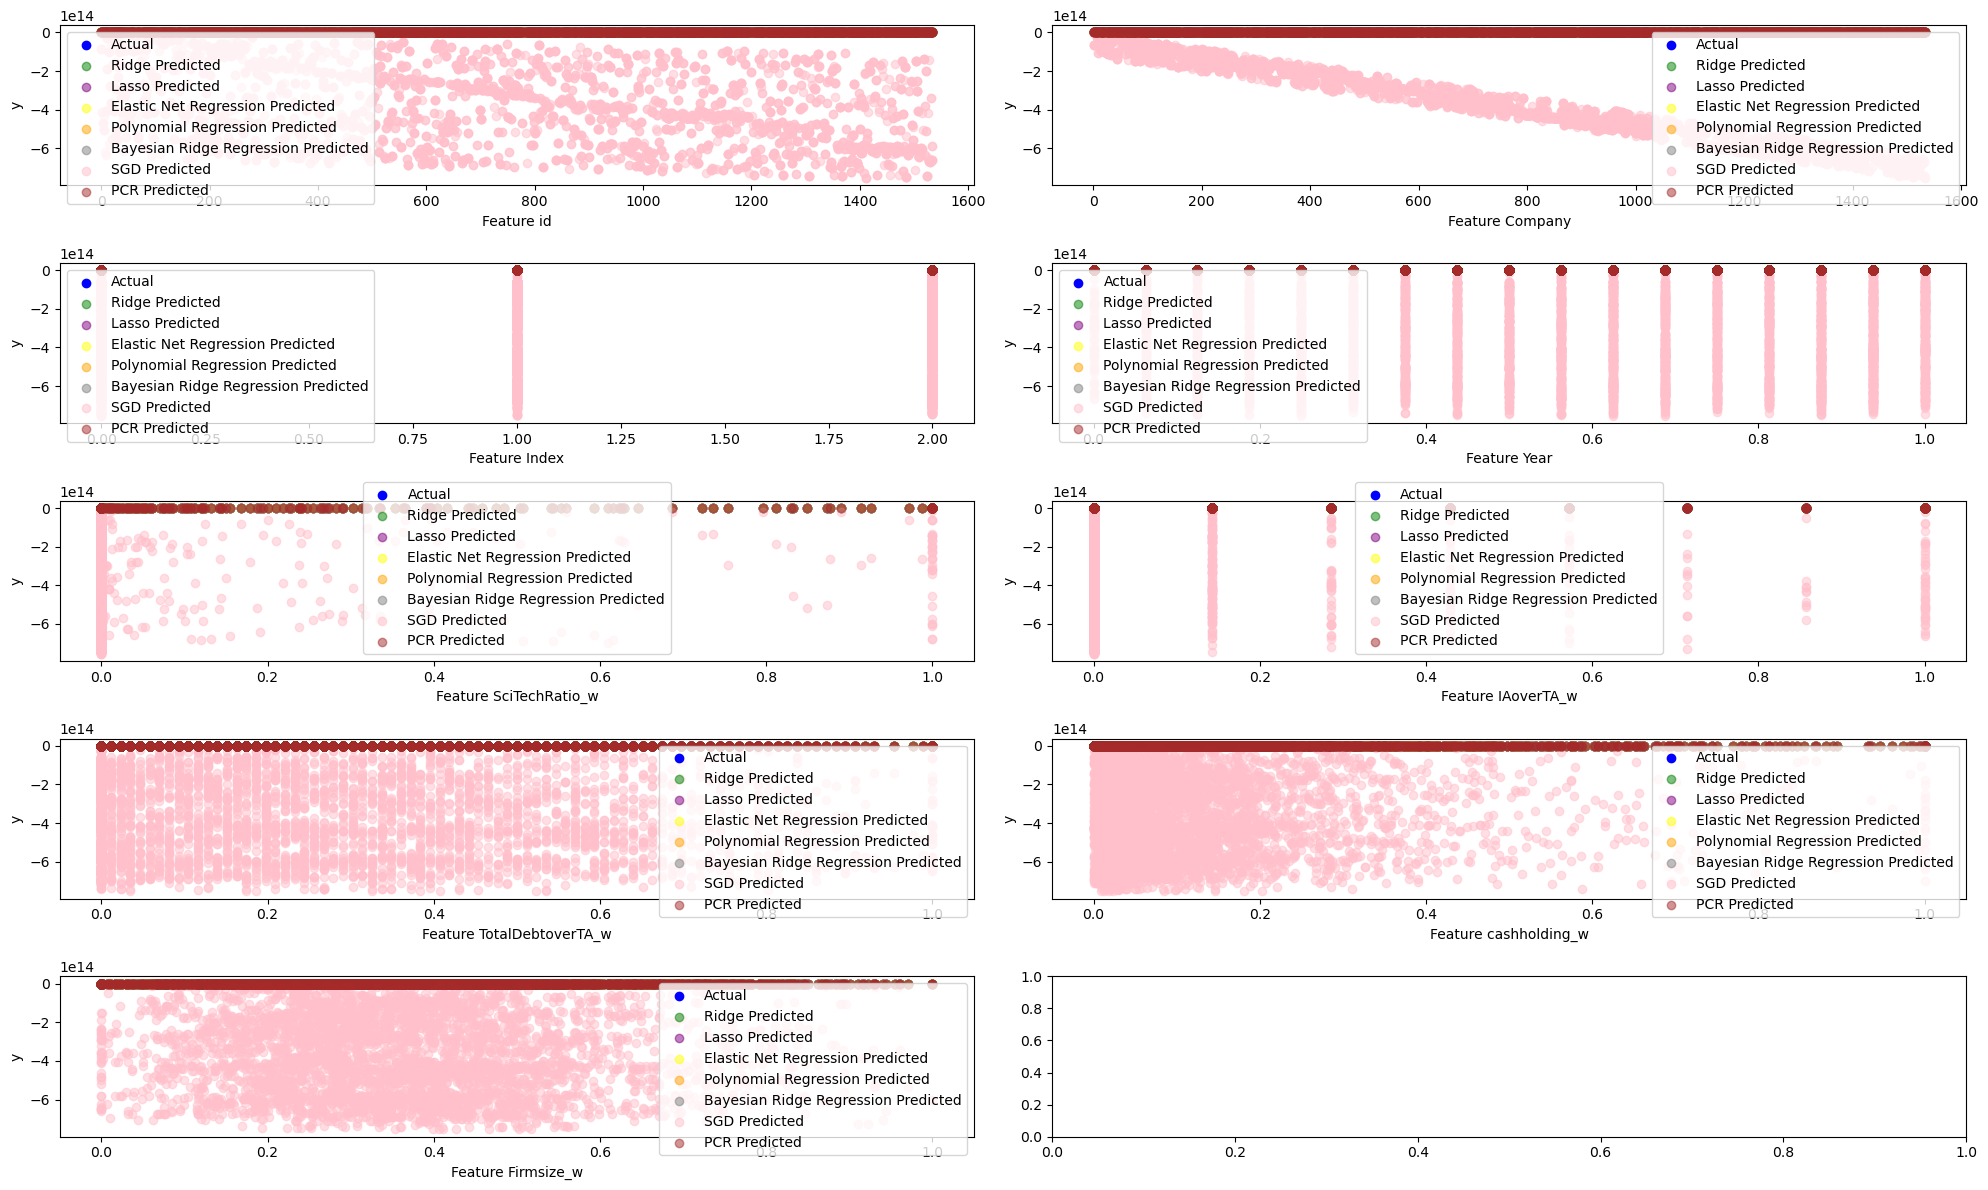

In [40]:
fig, axs = plt.subplots(5, 2, figsize=(20, 12))

for i in range(len(X.columns)):
    row, col = divmod(i, 2)
    axs[row, col].scatter(X_test[:, i], y_test, color='blue', label='Actual')
    axs[row, col].scatter(X_test[:, i], y_pred_ridge, color='green', label='Ridge Predicted', alpha=0.5)
    axs[row, col].scatter(X_test[:, i], y_pred_lasso, color='purple', label='Lasso Predicted', alpha=0.5)
    axs[row, col].scatter(X_test[:, i], y_pred_en, color='yellow', label='Elastic Net Regression Predicted', alpha=0.5)
    axs[row, col].scatter(X_test[:, i], y_pred_poly, color='orange', label='Polynomial Regression Predicted', alpha=0.5)
    axs[row, col].scatter(X_test[:, i], y_pred_br, color='gray', label='Bayesian Ridge Regression Predicted', alpha=0.5)
    axs[row, col].scatter(X_test[:, i], y_pred_sgd, color='pink', label='SGD Predicted', alpha=0.5)
    axs[row, col].scatter(X_test[:, i], y_pred_pca, color='brown', label='PCR Predicted', alpha=0.5)
    # axs[row, col].scatter(X_test[:, i], y_pred_pls, color='black', label='PLS Predicted', alpha=0.5)
    axs[row, col].set_xlabel(f'Feature {X.columns[i]}')
    axs[row, col].set_ylabel('y')
    axs[row, col].legend()

plt.tight_layout()
plt.show()    